## Strategy:
- Data Understanding
- Data Cleaning (Missing data imputation)
- EDA (Univariate--->Bivariate--->Heatmaps)
- Feature Engineering()
- Feature Selection (PCA)
- Model Development (Logistic Regression-->Dectsion Tree--->Random Forest---->GDB---->XGB---->Catboost....SVM)
- Model Evaluation  (Sensitivity,Precision,accuracy,AOC)
- Two Final Models.

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
#opening the data:
data=pd.read_csv('/Users/rishismac/telecom-churn-case-study-hackathon-c58/train.csv')
print(data.info(verbose=1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [3]:
#making a dictionary of the missing data percentage :
dict(data.isna().sum()/len(data)*100)

{'id': 0.0,
 'circle_id': 0.0,
 'loc_og_t2o_mou': 1.0028714695924228,
 'std_og_t2o_mou': 1.0028714695924228,
 'loc_ic_t2o_mou': 1.0028714695924228,
 'last_date_of_month_6': 0.0,
 'last_date_of_month_7': 0.570008142973471,
 'last_date_of_month_8': 1.0471578165402362,
 'arpu_6': 0.0,
 'arpu_7': 0.0,
 'arpu_8': 0.0,
 'onnet_mou_6': 3.954342204888641,
 'onnet_mou_7': 3.8386262660895154,
 'onnet_mou_8': 5.2900755725081785,
 'offnet_mou_6': 3.954342204888641,
 'offnet_mou_7': 3.8386262660895154,
 'offnet_mou_8': 5.2900755725081785,
 'roam_ic_mou_6': 3.954342204888641,
 'roam_ic_mou_7': 3.8386262660895154,
 'roam_ic_mou_8': 5.2900755725081785,
 'roam_og_mou_6': 3.954342204888641,
 'roam_og_mou_7': 3.8386262660895154,
 'roam_og_mou_8': 5.2900755725081785,
 'loc_og_t2t_mou_6': 3.954342204888641,
 'loc_og_t2t_mou_7': 3.8386262660895154,
 'loc_og_t2t_mou_8': 5.2900755725081785,
 'loc_og_t2m_mou_6': 3.954342204888641,
 'loc_og_t2m_mou_7': 3.8386262660895154,
 'loc_og_t2m_mou_8': 5.2900755725081785

## Checking the imbalance in the target variable:

In [4]:
#Checking the imbalance of data:
data['churn_probability'].sum()/len(data)*100

10.188716981671167

In [5]:
#creating a dataframe of 'isna' to understand the missing data better:
isna_df=pd.DataFrame(data.isna().sum()/len(data)*100)
isna_df=isna_df.sort_values(by=0,ascending=False)
isna_df=isna_df.reset_index()
isna_df.columns=['feature','percentage']




In [6]:
# Taking only those columns which have a missing data percentage less than 6 percent:
relevent_columns_df=isna_df[isna_df['percentage']<6]
imp_columns=list(relevent_columns_df['feature'])
imp_columns
data_refined_1=data[imp_columns]
pd.DataFrame(data_refined_1.isna().sum()/len(data)*100).head(60)


,0
isd_og_mou_8,5.290076
std_ic_t2o_mou_8,5.290076
std_og_t2c_mou_8,5.290076
std_ic_t2f_mou_8,5.290076
std_og_mou_8,5.290076
std_ic_t2m_mou_8,5.290076
std_ic_mou_8,5.290076
std_ic_t2t_mou_8,5.290076
og_others_8,5.290076
spl_og_mou_8,5.290076


In [7]:
# Extracting the numerical variables:
num_variables=[x for x in data_refined_1.columns if data_refined_1[x].dtype!='O']
other_variables=[x for x in data_refined_1.columns if data_refined_1[x].dtype=='O']
other_variables

['date_of_last_rech_8',
 'date_of_last_rech_7',
 'date_of_last_rech_6',
 'last_date_of_month_8',
 'last_date_of_month_7',
 'last_date_of_month_6']

### As can be seen most of the non numerical features are date columns. Hence i have imputed them to 'recency' to have them as numerical variables too.

In [8]:
# Converting the dates to recency and finally converting them to numerical variables:
import datetime as dt
for i in other_variables:
    data_refined_1[i]=pd.to_datetime(data_refined_1[i],format='%m/%d/%Y')
    
    data_refined_1['recency_'+i]=data_refined_1[i].max()-data_refined_1[i]
    data_refined_1['recency_'+i]=data_refined_1['recency_'+i].dt.days
    data_refined_1=data_refined_1.drop(i,axis=1)

    


In [9]:
# Checking the statistics of the data and finding the columns which do not have any variance or std:
data_refined_1.describe()

,isd_og_mou_8,std_ic_t2o_mou_8,std_og_t2c_mou_8,std_ic_t2f_mou_8,std_og_mou_8,std_ic_t2m_mou_8,std_ic_mou_8,std_ic_t2t_mou_8,og_others_8,spl_og_mou_8,...,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,churn_probability,recency_date_of_last_rech_8,recency_date_of_last_rech_7,recency_date_of_last_rech_6,recency_last_date_of_month_8,recency_last_date_of_month_7,recency_last_date_of_month_6
count,66296.000000,66296.0,66296.0,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,67538.000000,68765.000000,68898.000000,69266.0,69600.0,69999.0
mean,0.841648,0.0,0.0,2.075179,175.118852,21.089042,33.077030,9.910217,0.033059,5.045027,...,51.773924,51.240204,50.127506,0.101887,5.558012,5.494292,5.871869,0.0,0.0,0.0
std,29.563367,0.0,0.0,15.865403,410.697098,81.534344,108.469864,54.248186,2.232547,17.708507,...,212.513909,211.114667,213.101403,0.302502,6.108002,5.765762,6.134773,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0
50%,0.000000,0.0,0.0,0.000000,10.505000,2.030000,5.830000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,3.000000,0.0,0.0,0.0
75%,0.000000,0.0,0.0,0.000000,149.015000,15.310000,27.615000,4.052500,0.000000,4.002500,...,0.000000,0.000000,0.000000,0.000000,7.000000,8.000000,9.000000,0.0,0.0,0.0
max,5681.540000,0.0,0.0,1394.890000,13980.060000,5512.760000,5658.740000,3930.240000,394.930000,1075.080000,...,10285.900000,7873.550000,11117.610000,1.000000,30.000000,30.000000,29.000000,0.0,0.0,0.0


In [10]:
# Removing the columns which do not have any variance:
cols=data_refined_1.describe().columns
cols=cols[(np.array(data_refined_1.describe()['std':])!=0)[0]]
data_final=data_refined_1[cols]

In [11]:
# Having a final look at the info of the data:
data_final.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 129 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    isd_og_mou_8                 float64
 1    std_ic_t2f_mou_8             float64
 2    std_og_mou_8                 float64
 3    std_ic_t2m_mou_8             float64
 4    std_ic_mou_8                 float64
 5    std_ic_t2t_mou_8             float64
 6    og_others_8                  float64
 7    spl_og_mou_8                 float64
 8    loc_ic_t2m_mou_8             float64
 9    loc_ic_mou_8                 float64
 10   loc_ic_t2f_mou_8             float64
 11   std_og_t2f_mou_8             float64
 12   loc_og_t2c_mou_8             float64
 13   ic_others_8                  float64
 14   loc_og_mou_8                 float64
 15   onnet_mou_8                  float64
 16   offnet_mou_8                 float64
 17   roam_ic_mou_8                float64
 18   roam_og_mou_8           

## Data Imputation and Scaling:

In [12]:
# Using SimpleImputer to impute the data with median values:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
arr=imputer.fit_transform(data_final)


# Scaling the data:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
arr_scaled=scaler.fit_transform(arr)
df=pd.DataFrame(arr_scaled)
df.columns=data_final.columns

# All the columns are now numeric columns:
num_variables=list(df.columns)
num_variables

['isd_og_mou_8',
 'std_ic_t2f_mou_8',
 'std_og_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_mou_8',
 'std_ic_t2t_mou_8',
 'og_others_8',
 'spl_og_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_8',
 'loc_ic_t2f_mou_8',
 'std_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'ic_others_8',
 'loc_og_mou_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'std_og_t2m_mou_8',
 'loc_ic_t2t_mou_8',
 'isd_ic_mou_8',
 'std_og_t2t_mou_8',
 'spl_ic_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'ic_others_6',
 'loc_ic_mou_6',
 'std_ic_t2f_mou_6',
 'isd_ic_mou_6',
 'std_ic_mou_6',
 'spl_ic_mou_6',
 'loc_ic_t2f_mou_6',
 'isd_og_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'loc_og_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2m_mou_6',
 'std_og_mou_6',
 'loc_og_t2t_mou_6',
 'std_og_t2t_mou_6',
 'loc_ic_t2t_mou_6',
 'spl_og_mou_6',
 'onnet_mou_6',
 'roam_ic_mou_6',
 'og_others_6',
 'roam_og_mou_6

In [13]:
np.percentile(df['recency_date_of_last_rech_7'],20)

0.03333333333333333

In [14]:
def outlier_removal(arr,k):
    upper_limit=np.percentile(arr,80)
    lower_limit=np.percentile(arr,20)
    iqr=upper_limit-lower_limit
    arr=df[(arr>lower_limit-k*iqr) and (arr<upper_limit+k*iqr)]
    return arr

In [41]:
df.describe()

,isd_og_mou_8,std_ic_t2f_mou_8,std_og_mou_8,std_ic_t2m_mou_8,std_ic_mou_8,std_ic_t2t_mou_8,og_others_8,spl_og_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,...,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,churn_probability,recency_date_of_last_rech_8,recency_date_of_last_rech_7,recency_date_of_last_rech_6
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,0.000140,0.001409,0.011903,0.003643,0.005591,0.002388,0.000079,0.004444,0.016817,0.015075,...,0.015817,0.019127,0.014046,0.005033,0.006508,0.004509,0.101887,0.183441,0.182265,0.200921
std,0.005064,0.011074,0.028711,0.014414,0.018686,0.013445,0.005501,0.016065,0.025844,0.022452,...,0.024428,0.030784,0.022926,0.020661,0.026813,0.019168,0.302502,0.200218,0.190603,0.210235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000034,0.000000,0.000000,0.000000,0.003296,0.003275,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.034483
50%,0.000000,0.000000,0.000751,0.000368,0.001030,0.000000,0.000000,0.000000,0.009278,0.008669,...,0.007481,0.009677,0.006743,0.000000,0.000000,0.000000,0.000000,0.133333,0.133333,0.103448
75%,0.000000,0.000000,0.009347,0.002532,0.004508,0.000873,0.000000,0.003293,0.020369,0.018282,...,0.027431,0.035484,0.029220,0.000000,0.000000,0.000000,0.000000,0.233333,0.266667,0.310345
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## EDA

### Univariate Analysis:

In [23]:
for i in num_variables:
    arr=np.array(df[i])
    uq=np.percentile(arr,75)
    lq=np.percentile(arr,25)
    iqr=uq-lq
    ul=uq+(3*iqr)
    ll=lq-(3*iqr)
    grouped_df=df[(df[i]<ul) & (df[i]>ll)]
    sns.boxplot(grouped_df[i])
    plt.show()

KeyError: 0

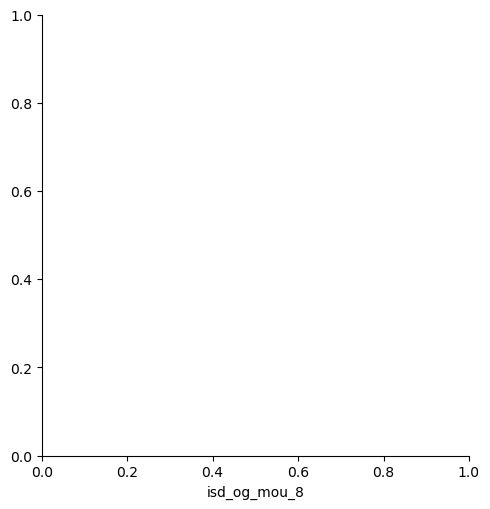

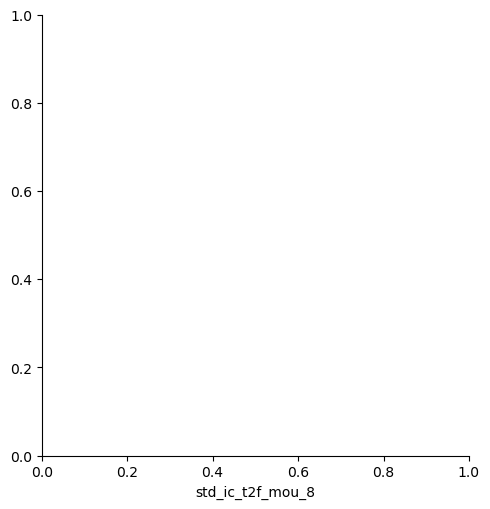

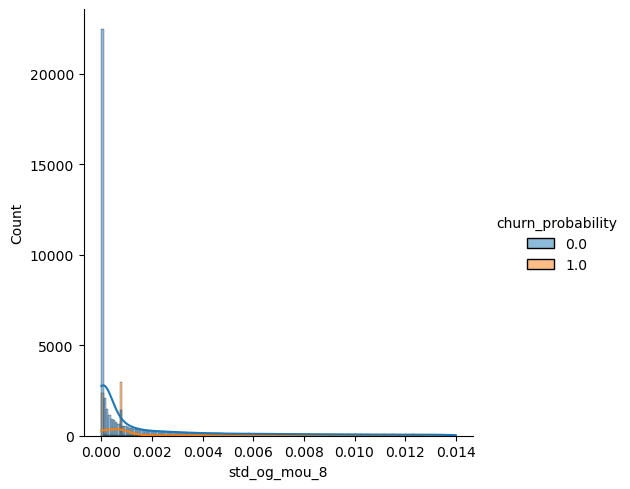

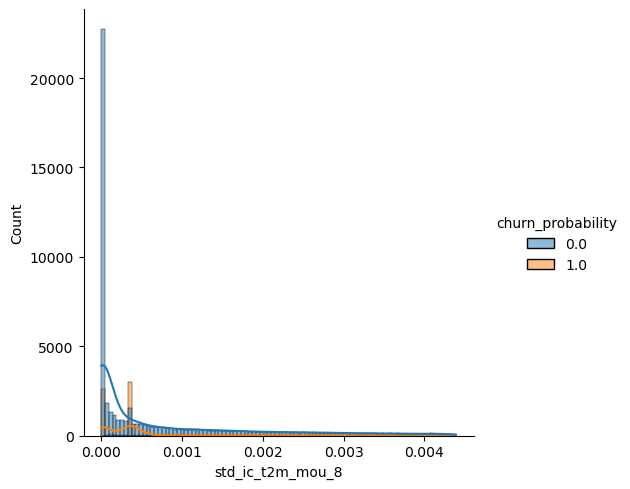

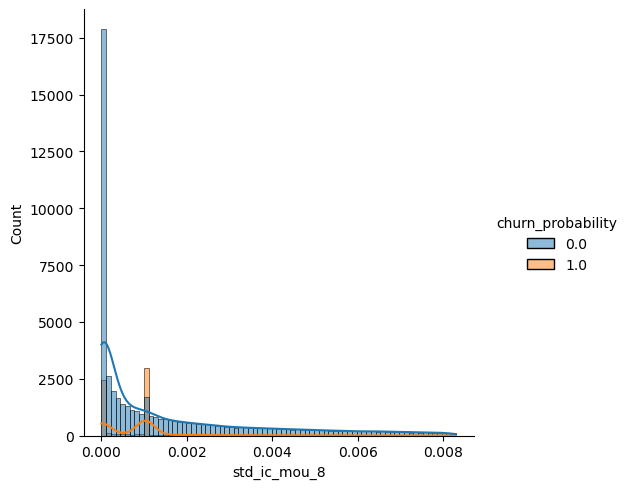

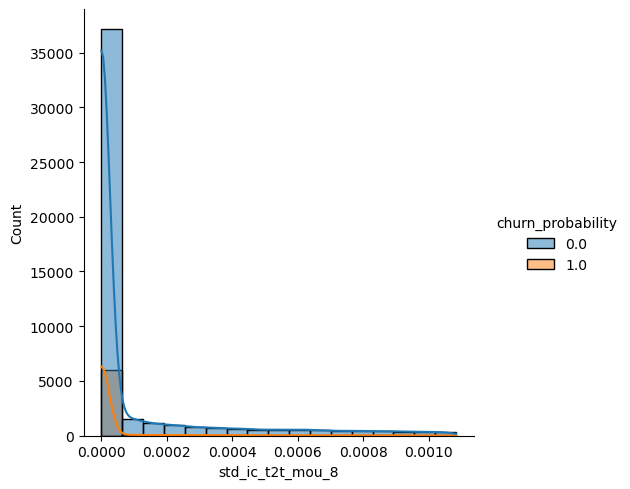

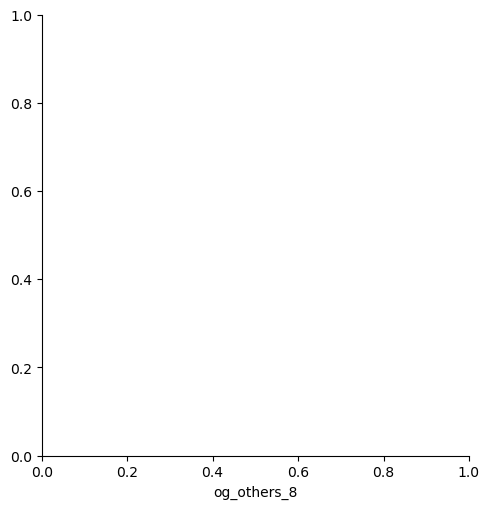

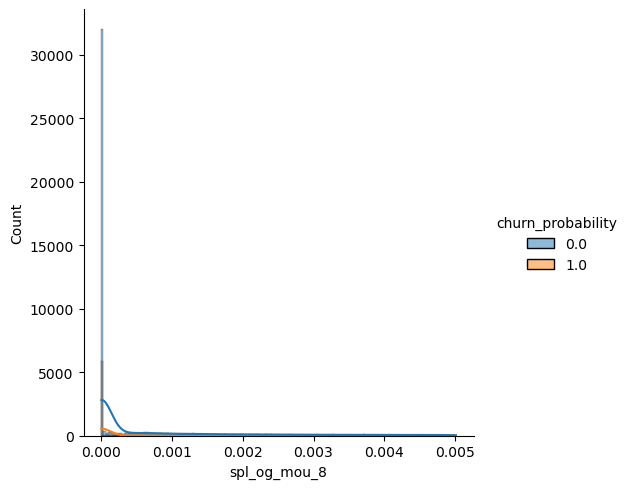

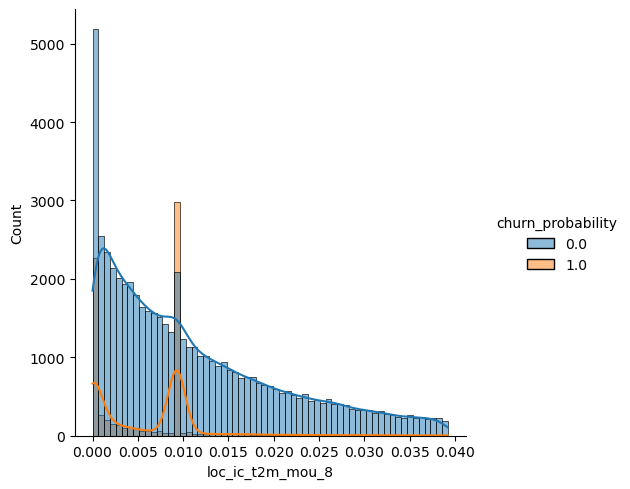

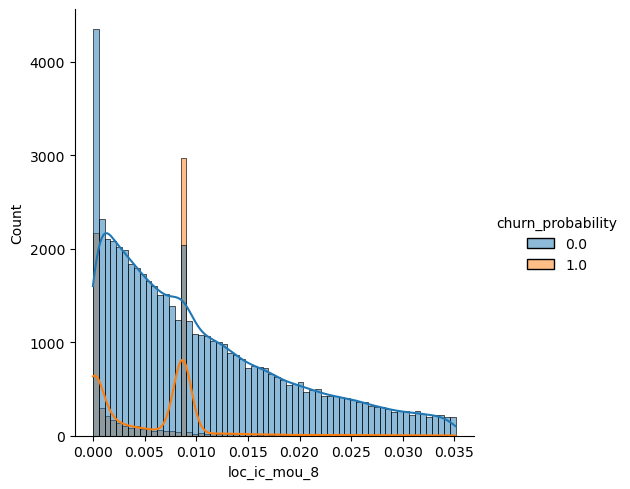

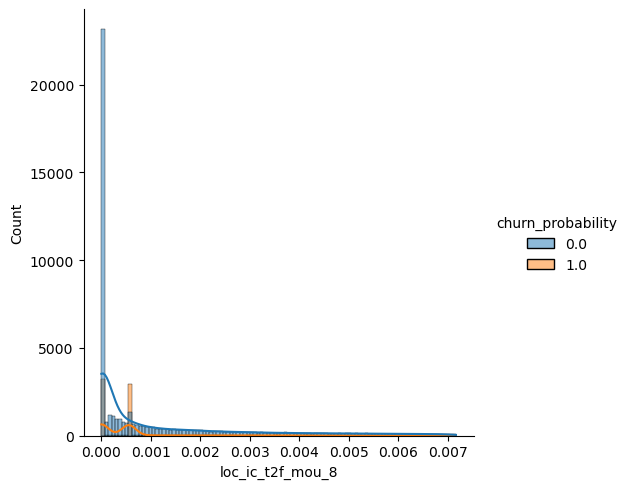

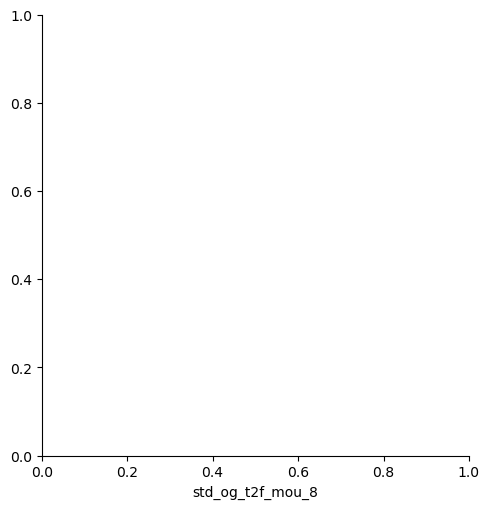

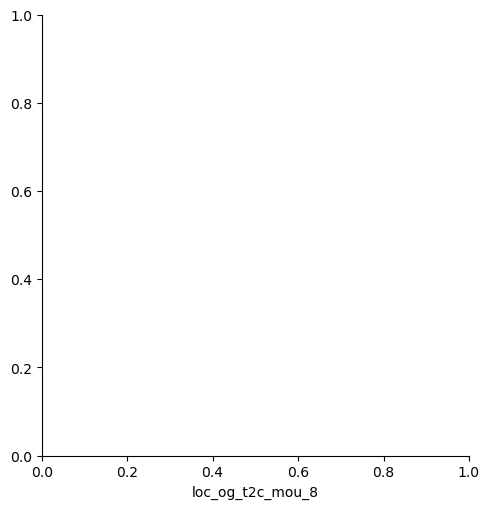

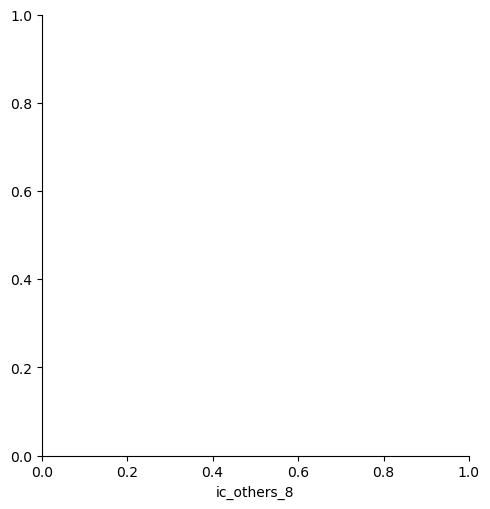

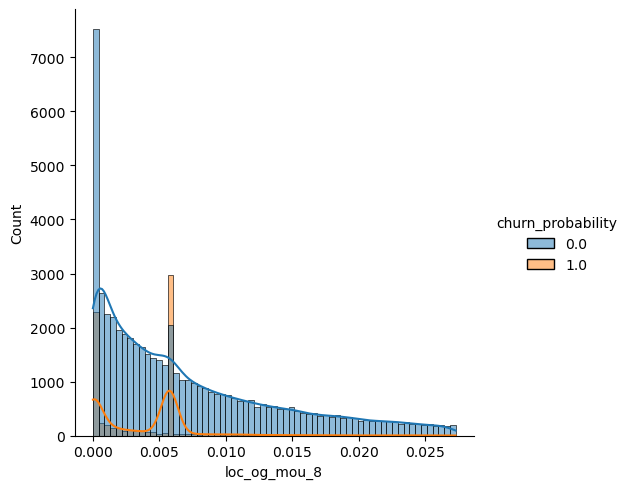

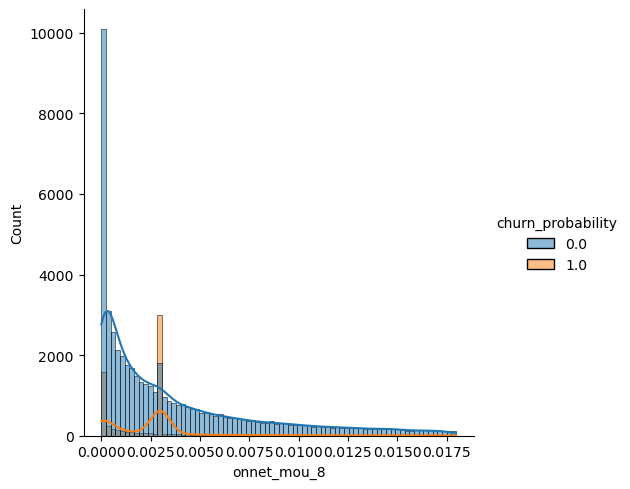

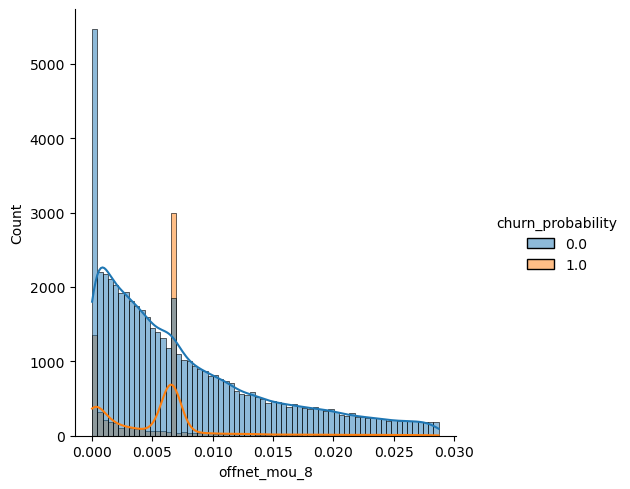

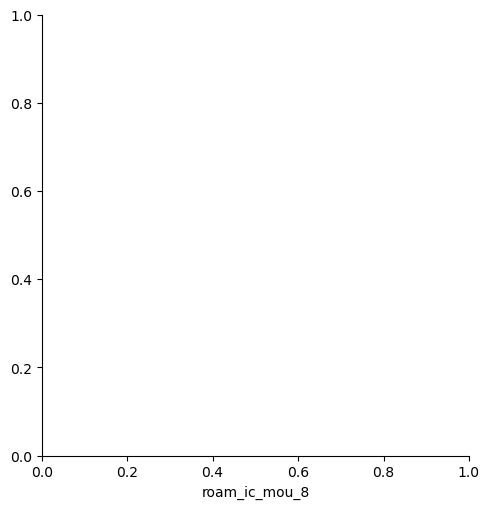

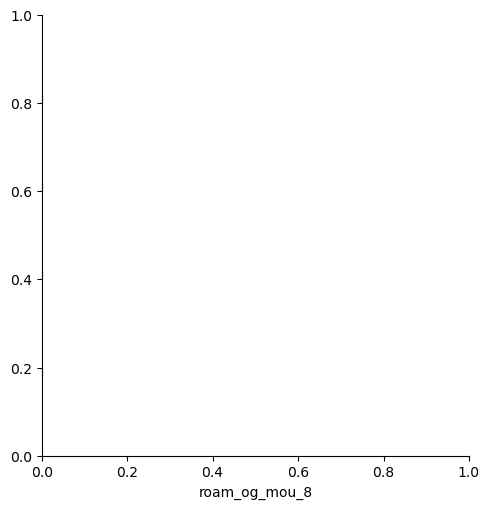

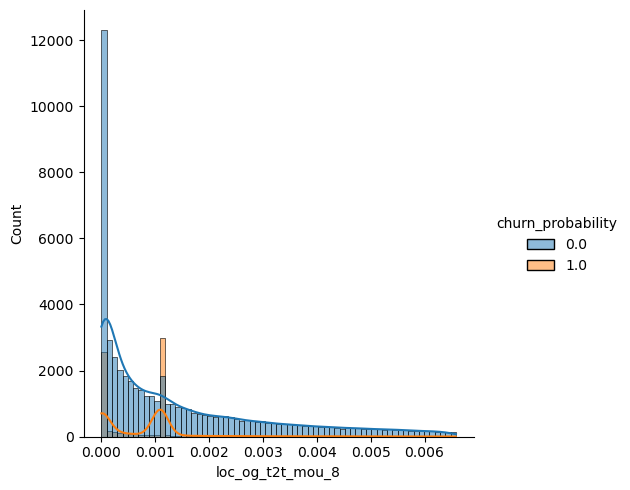

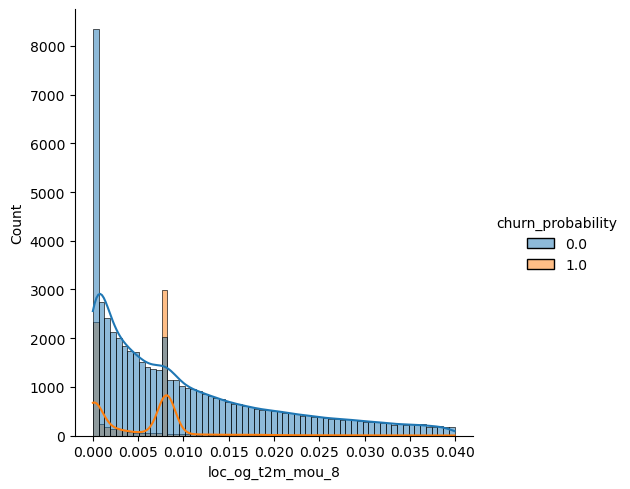

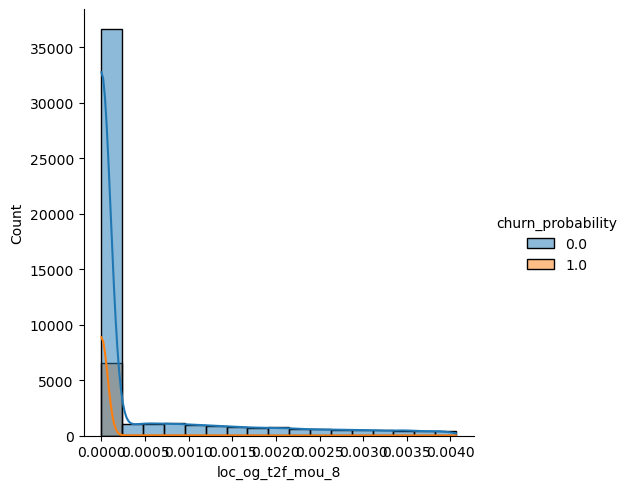

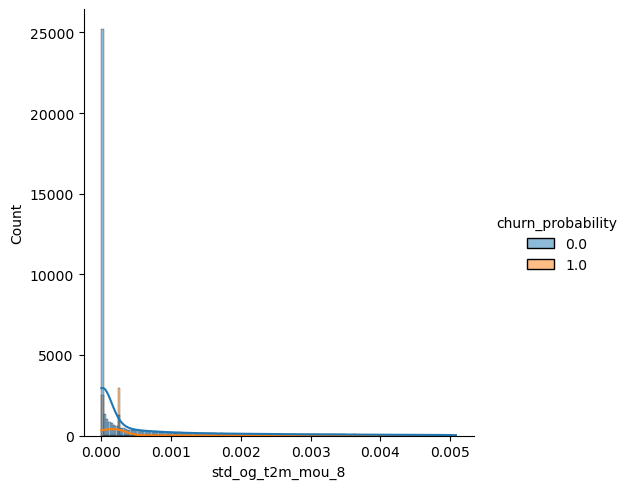

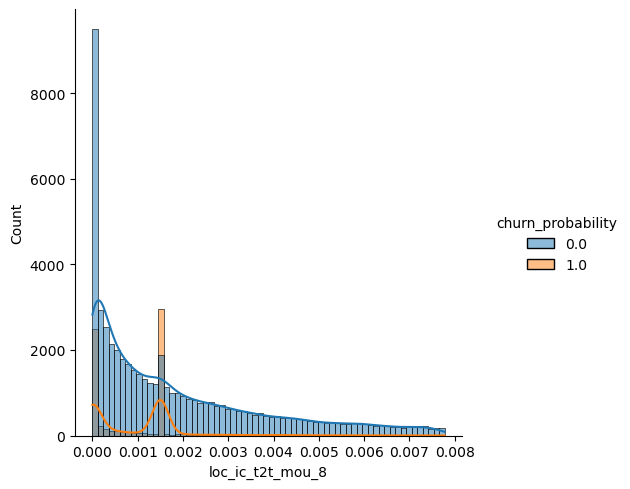

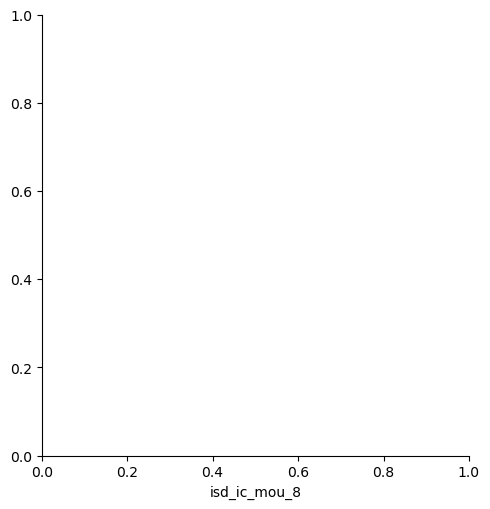

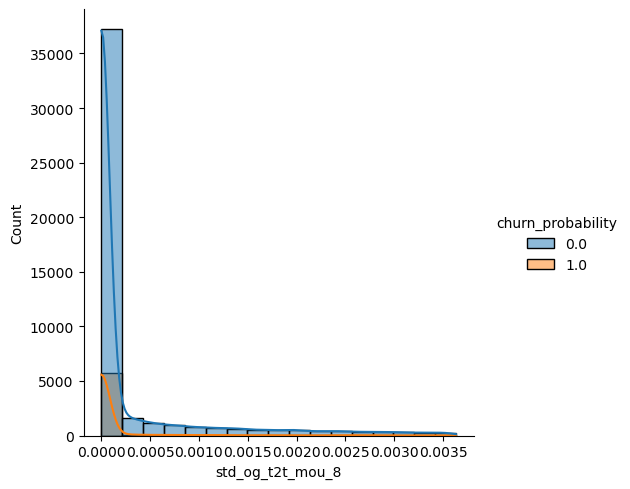

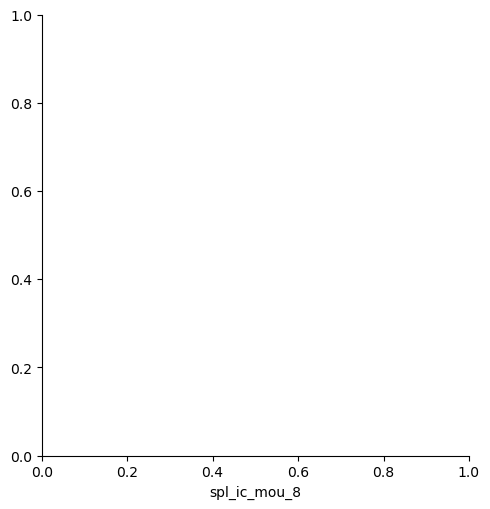

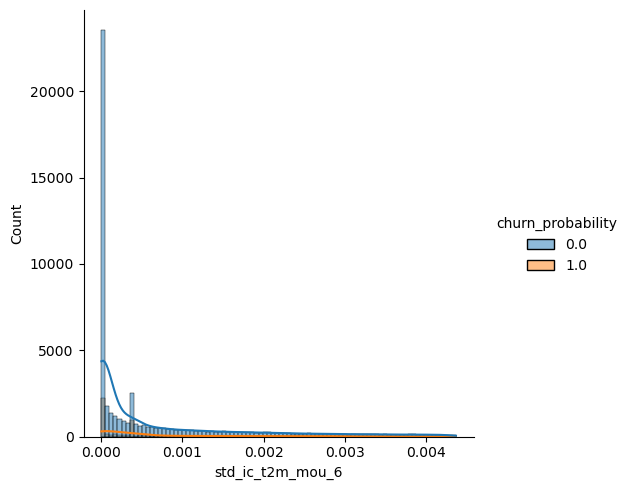

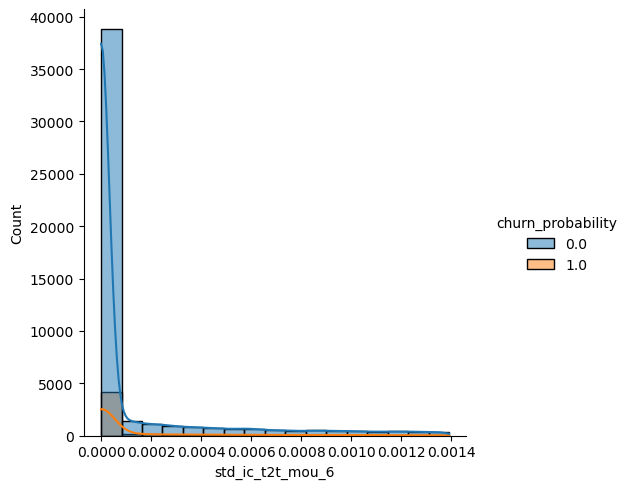

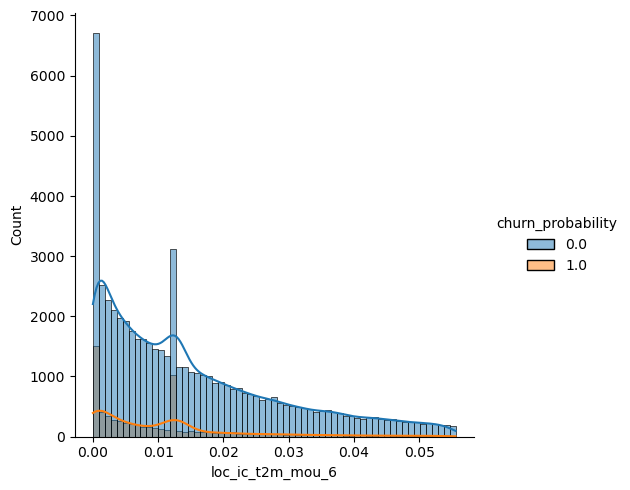

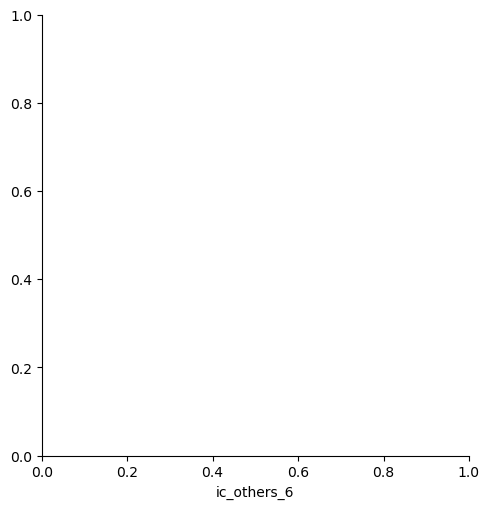

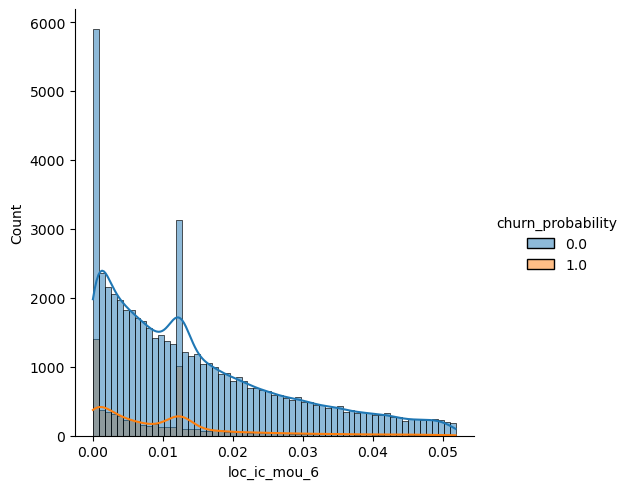

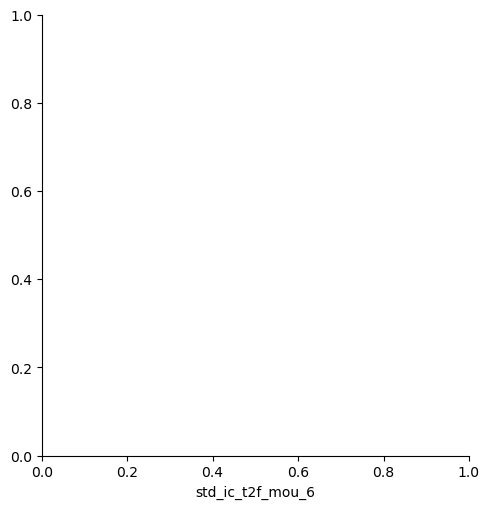

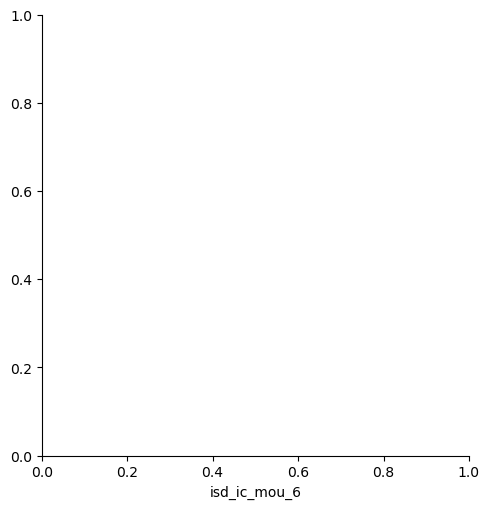

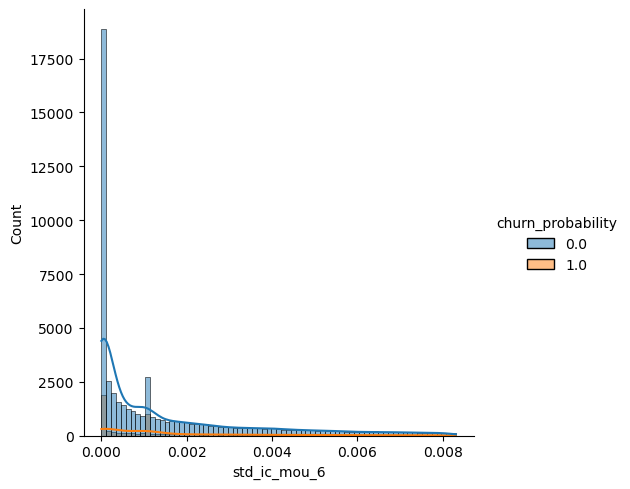

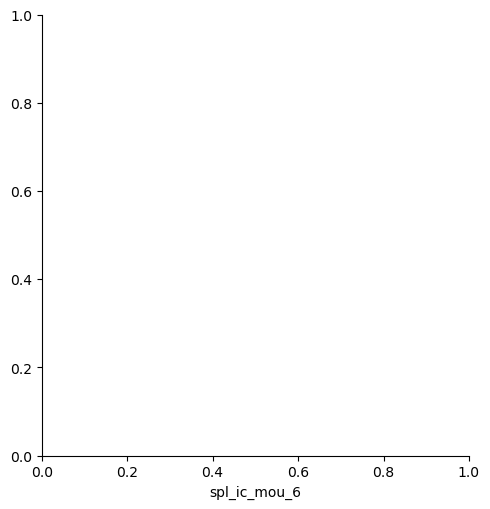

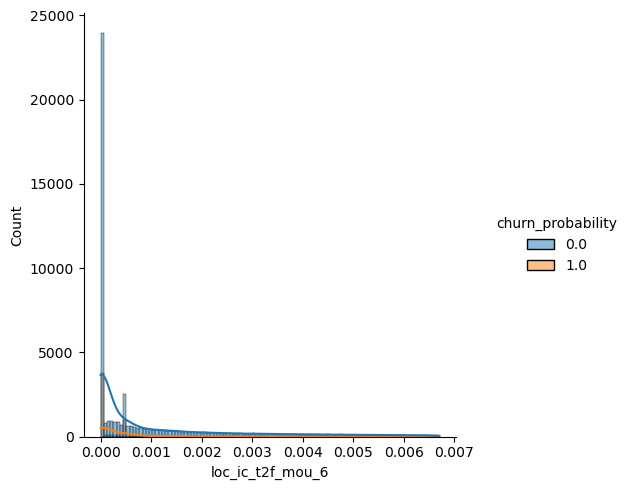

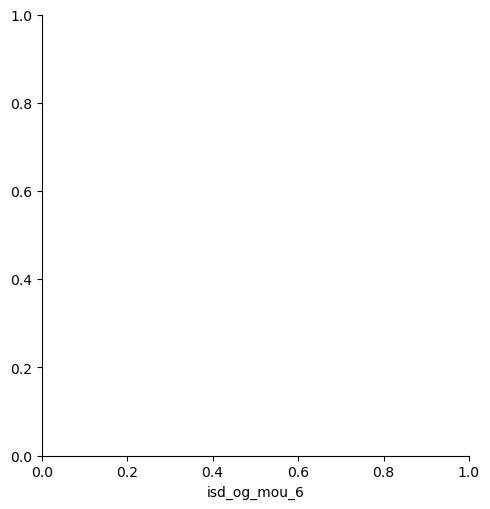

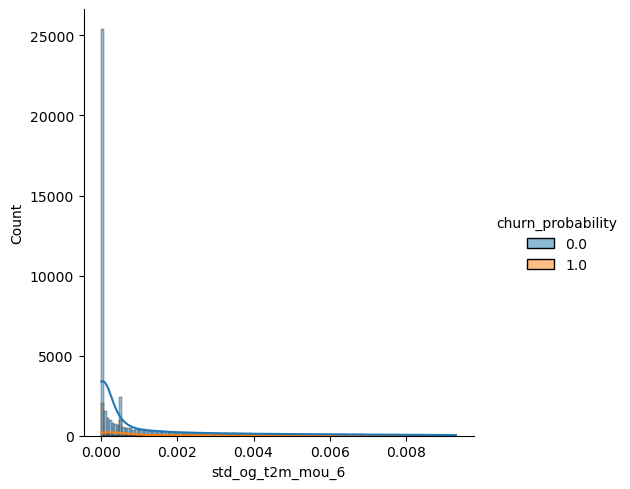

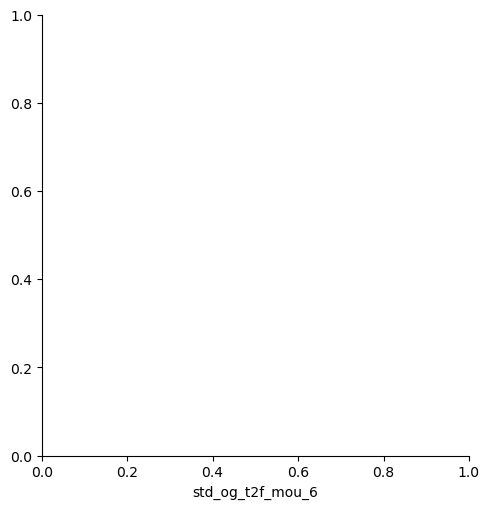

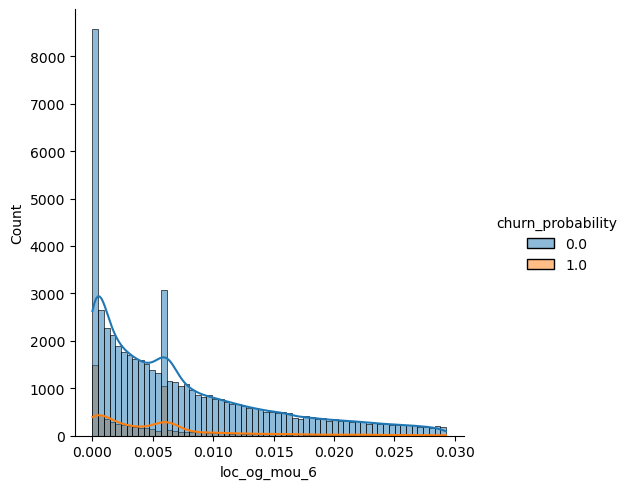

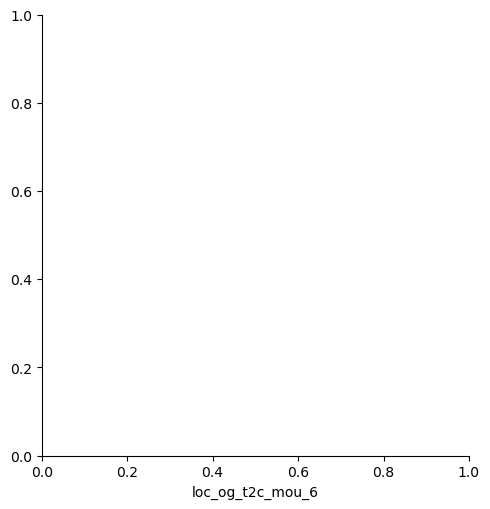

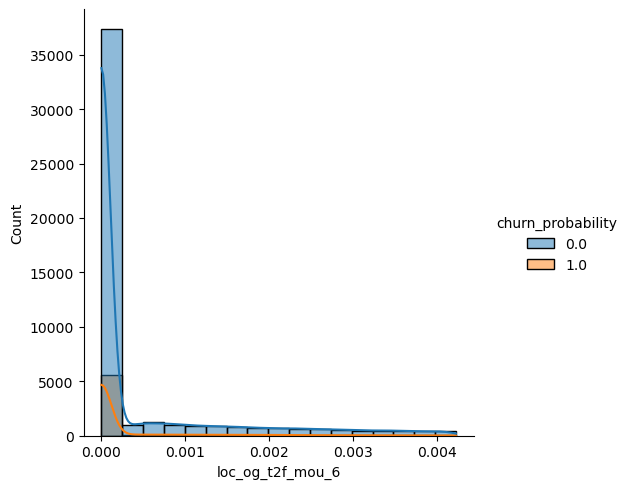

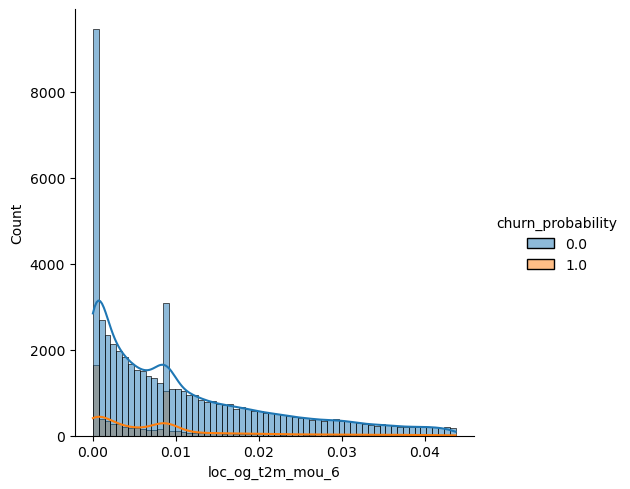

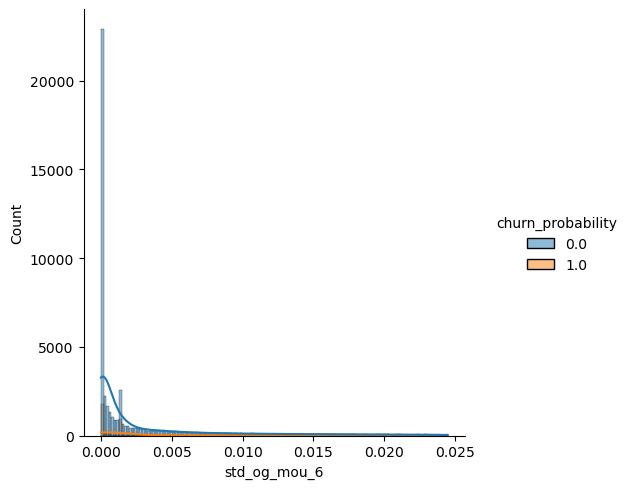

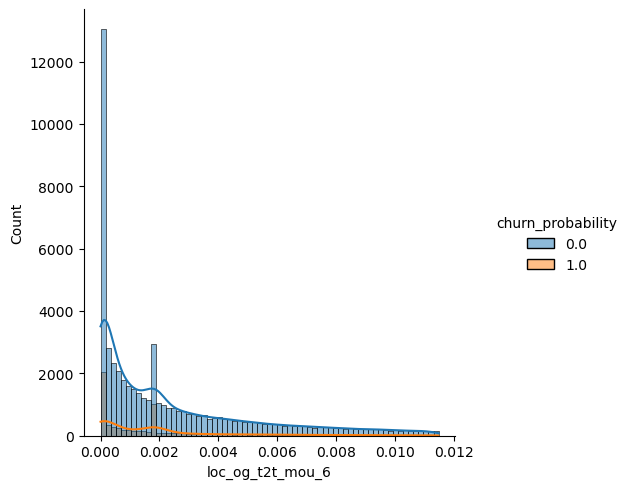

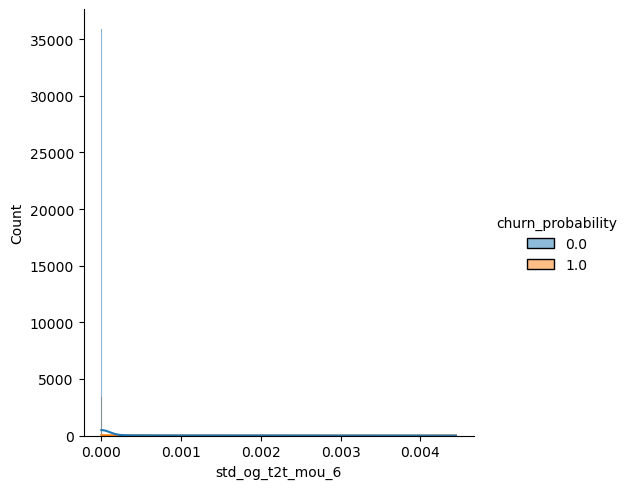

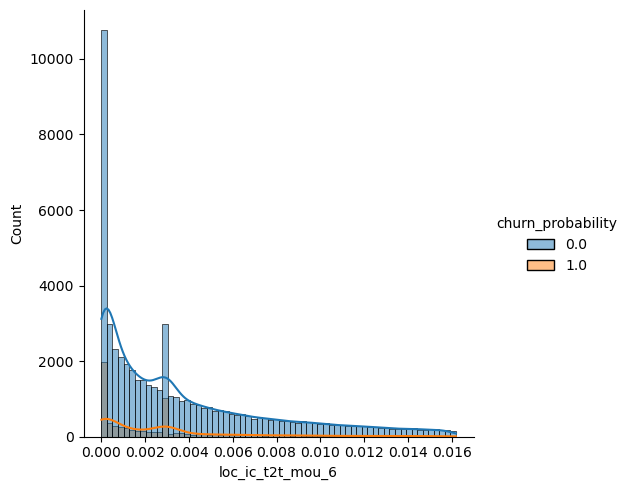

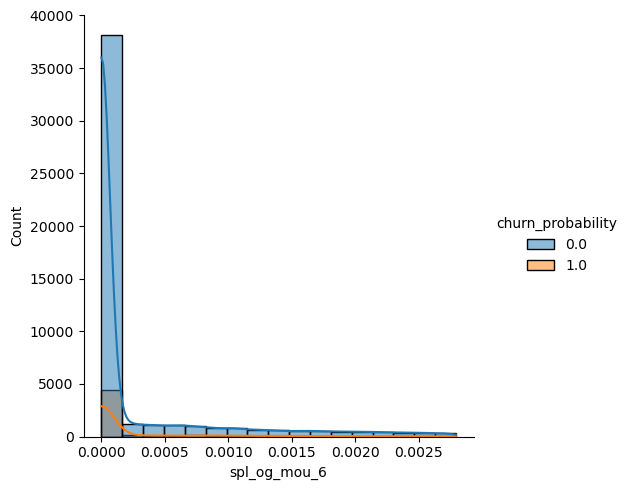

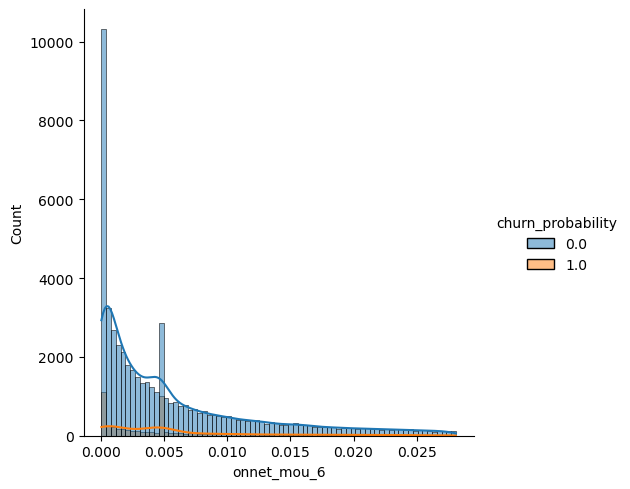

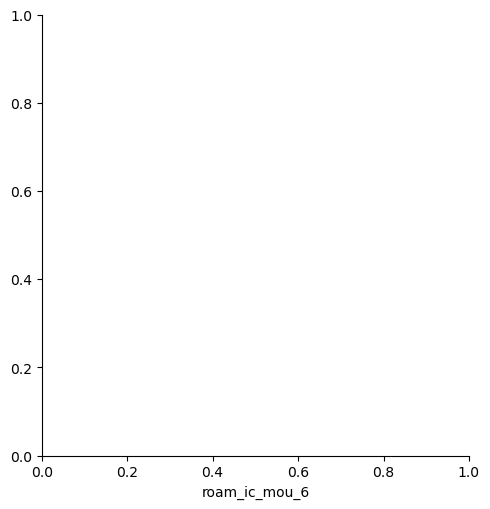

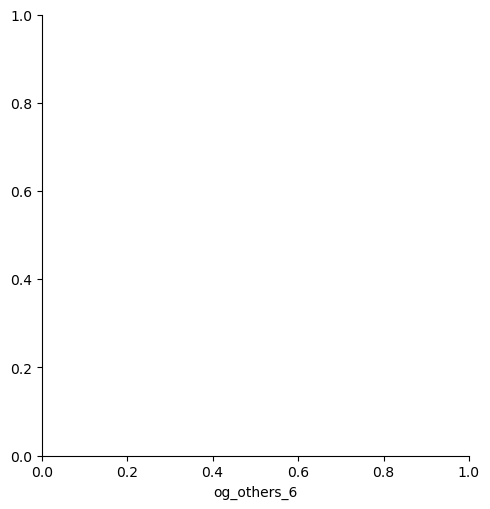

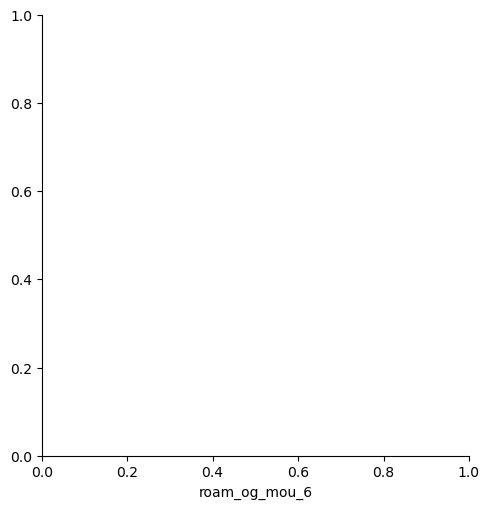

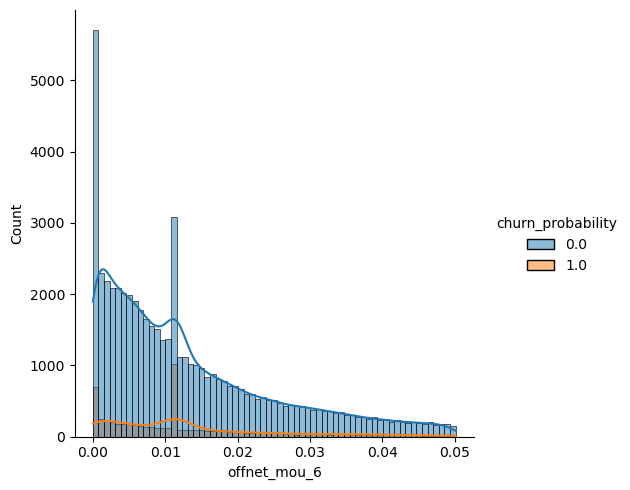

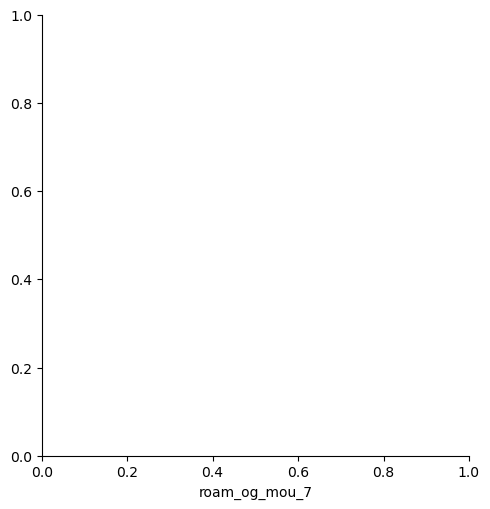

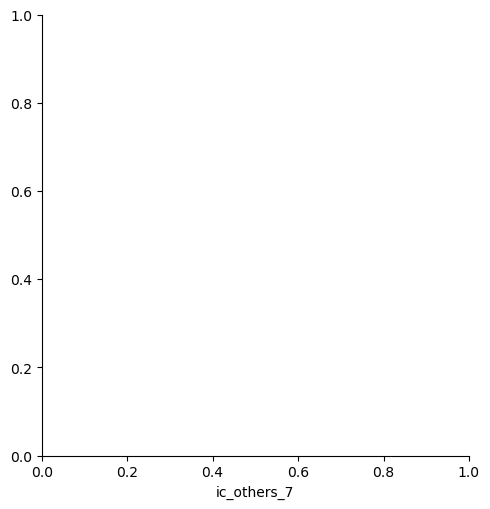

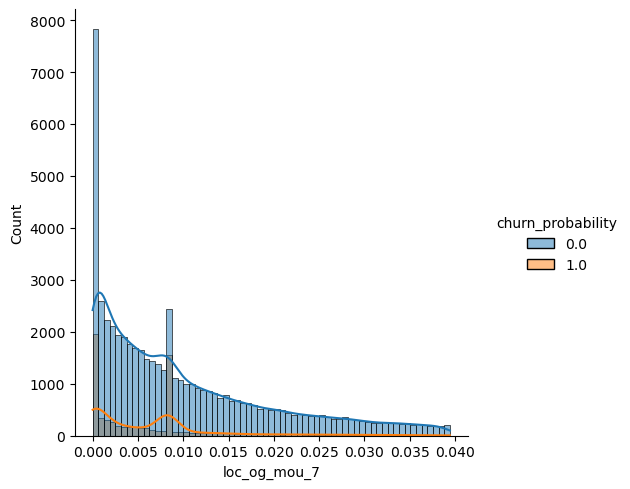

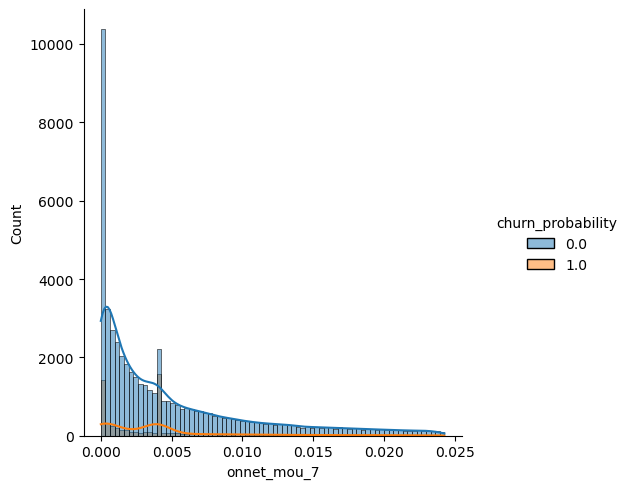

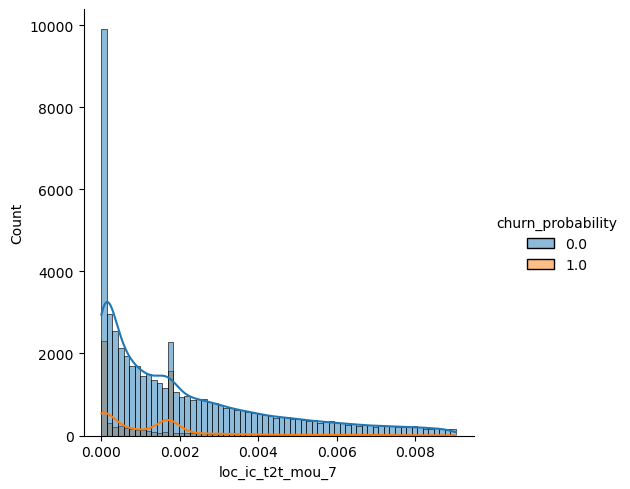

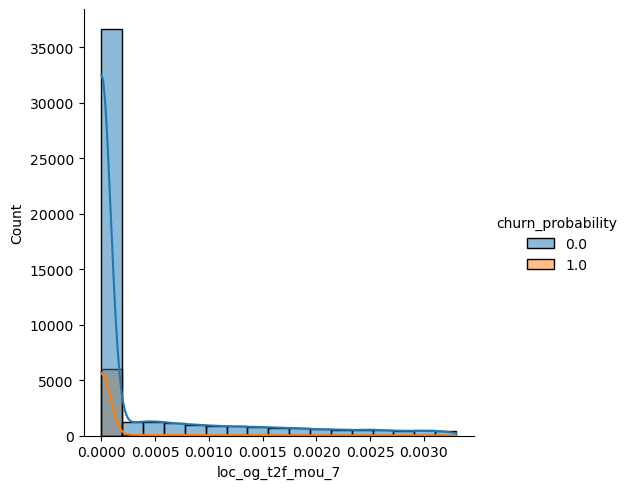

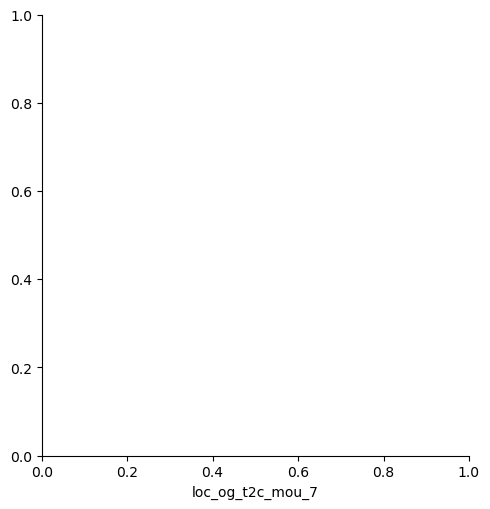

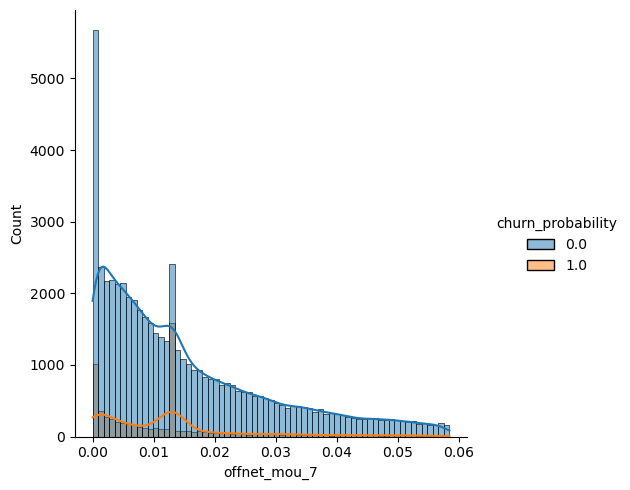

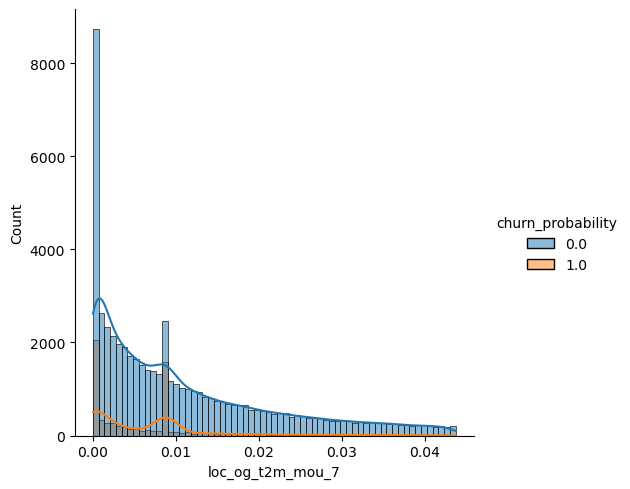

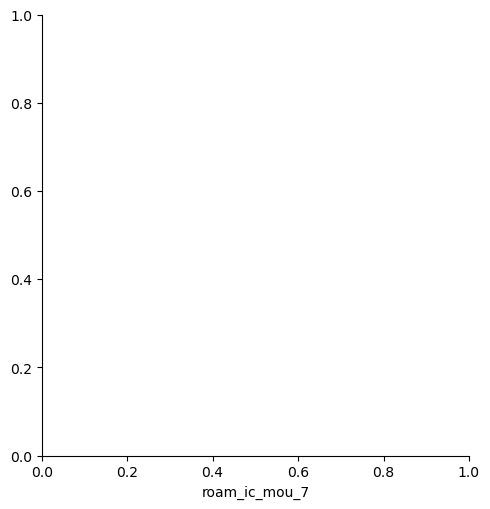

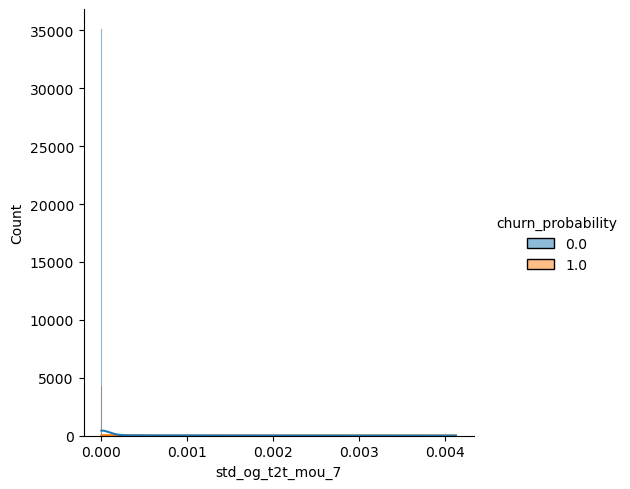

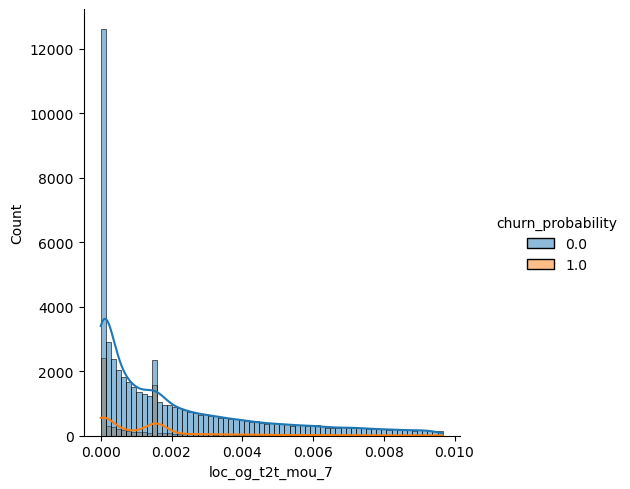

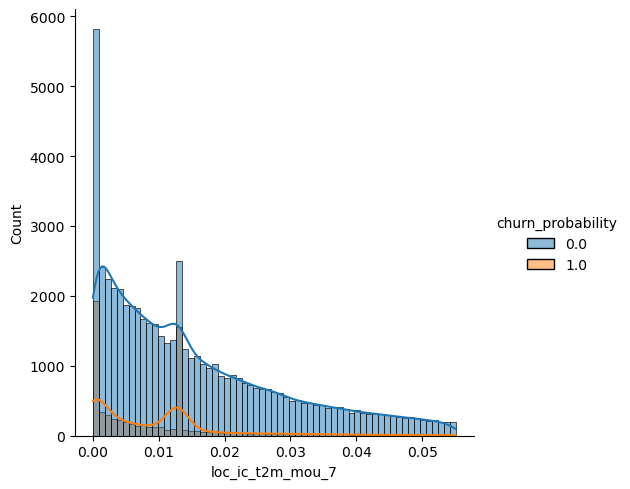

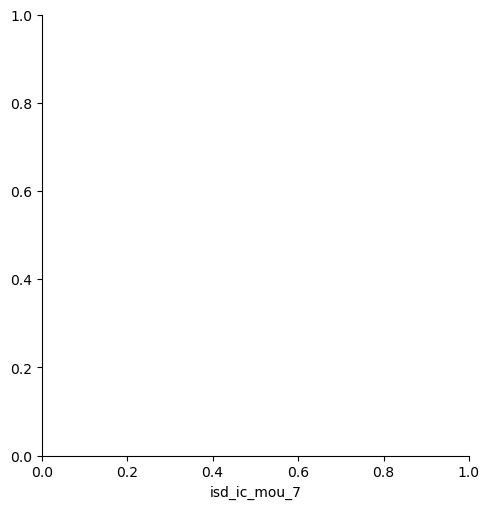

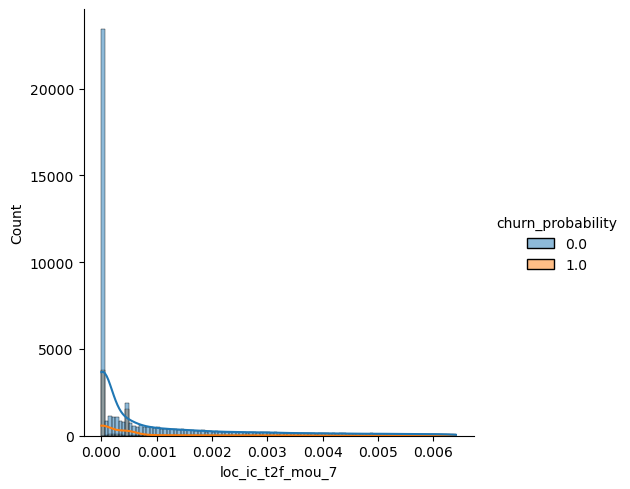

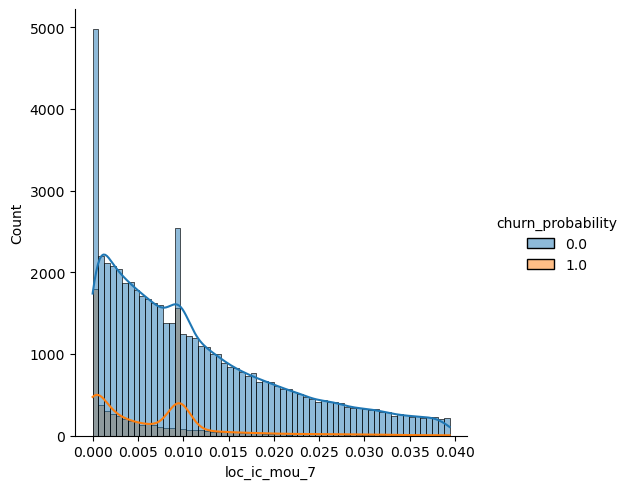

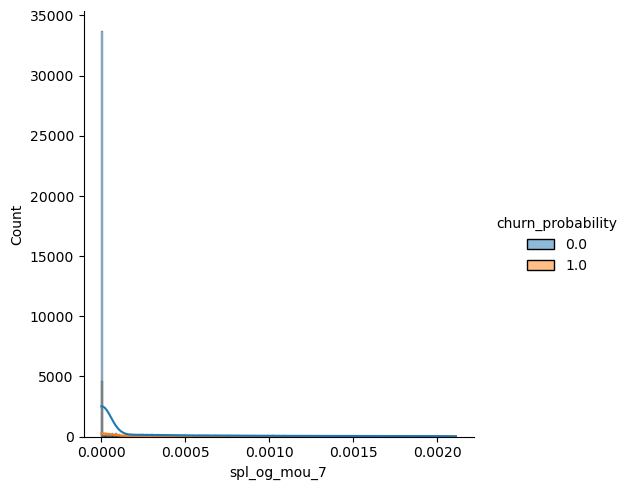

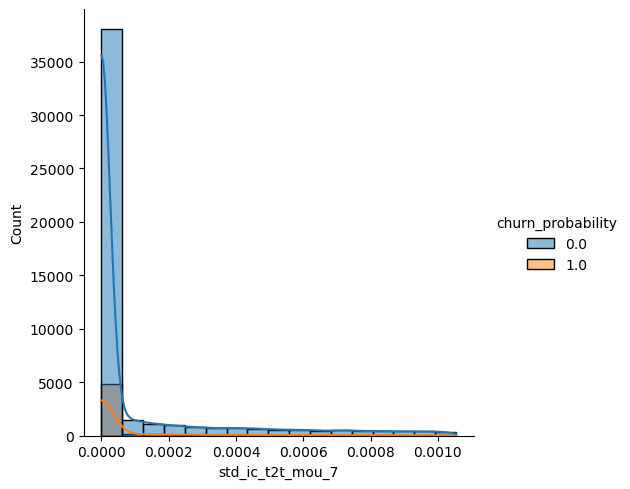

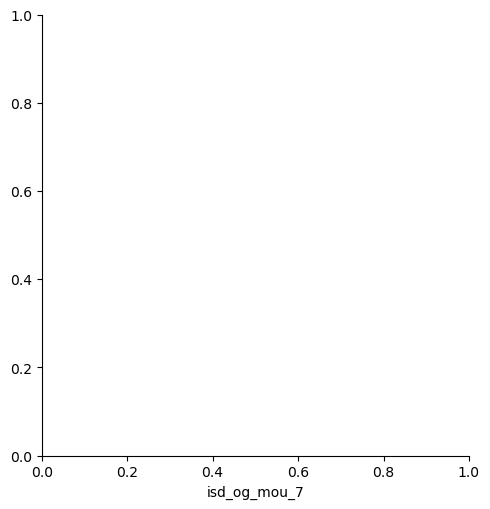

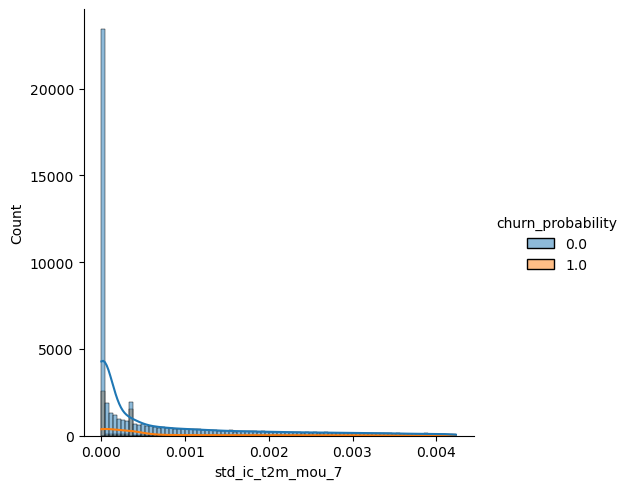

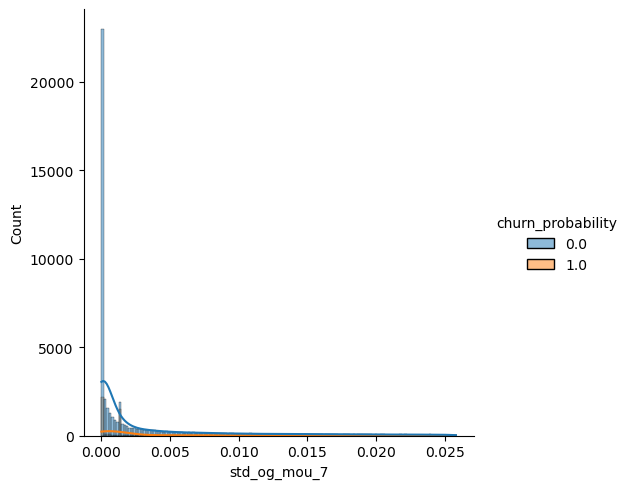

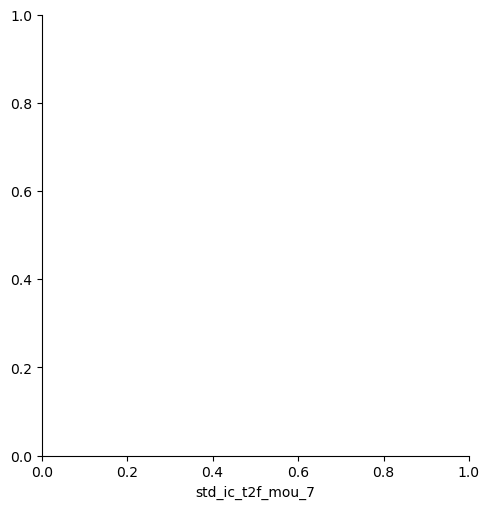

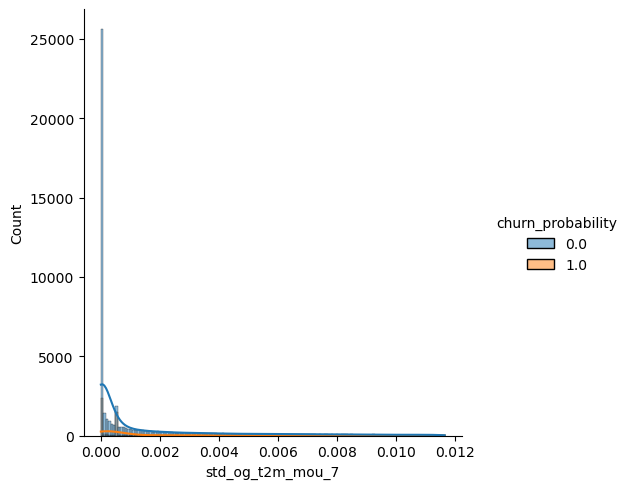

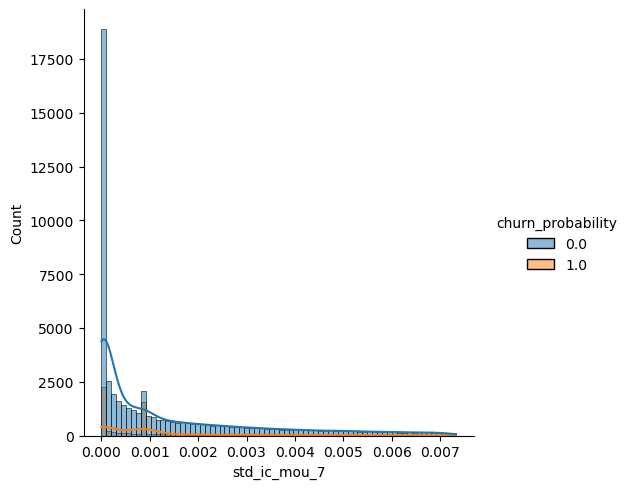

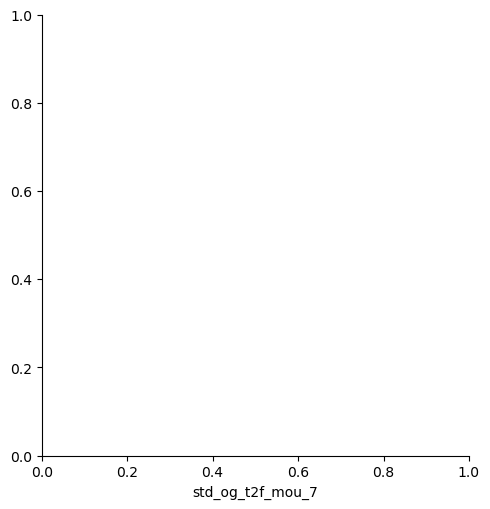

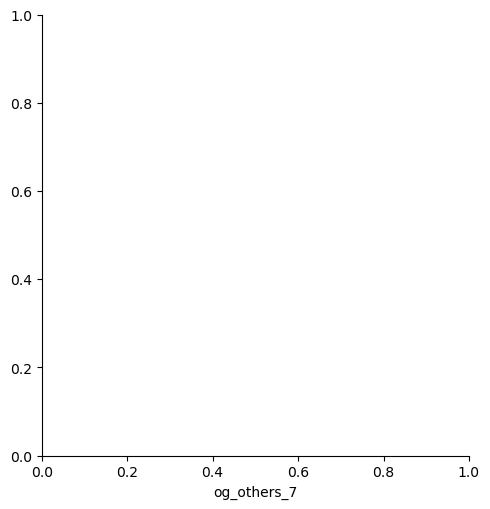

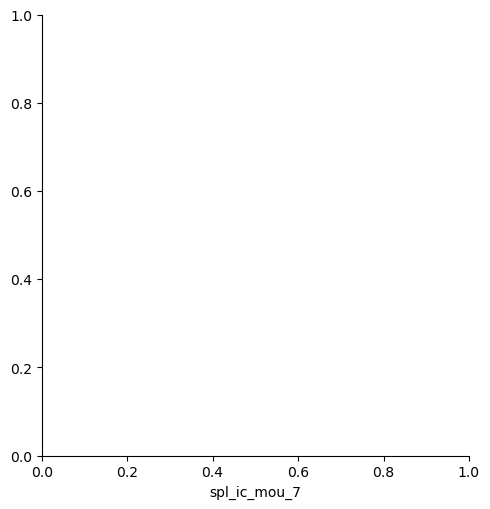

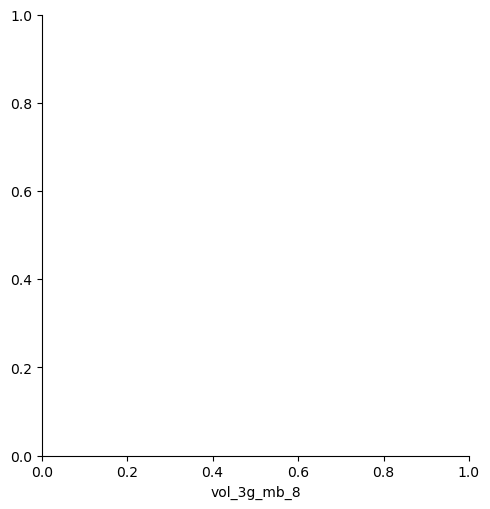

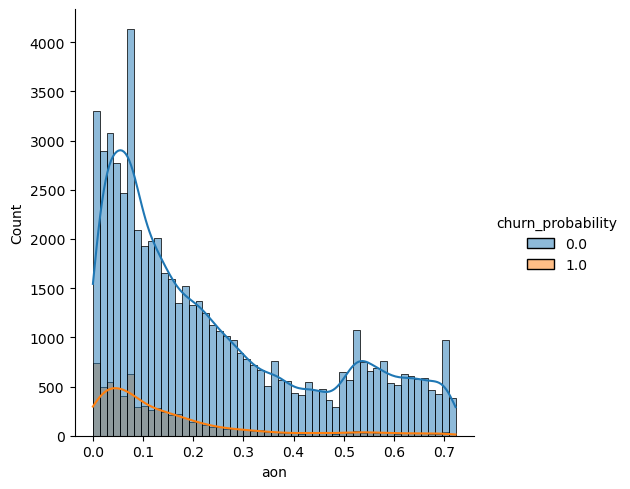

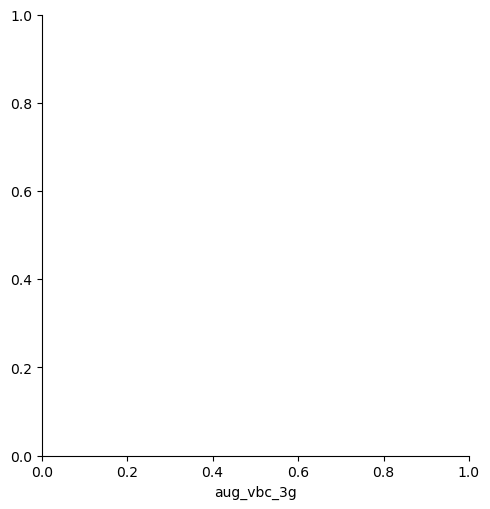

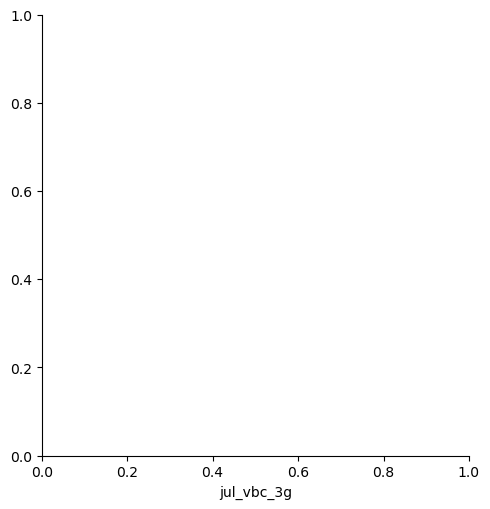

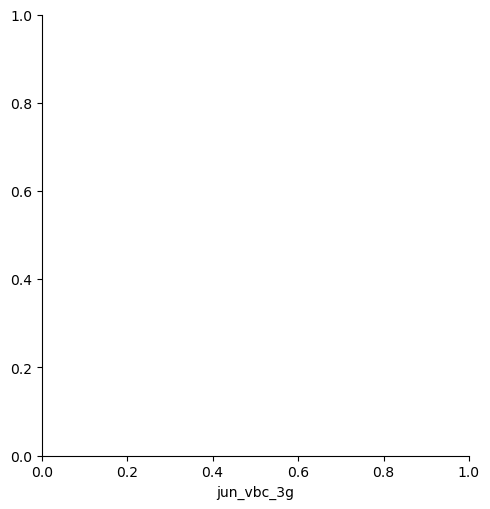

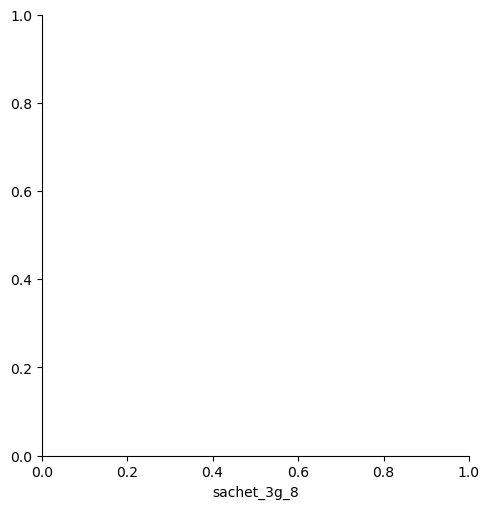

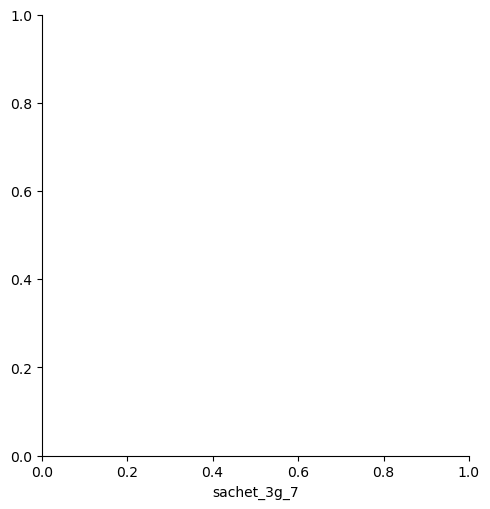

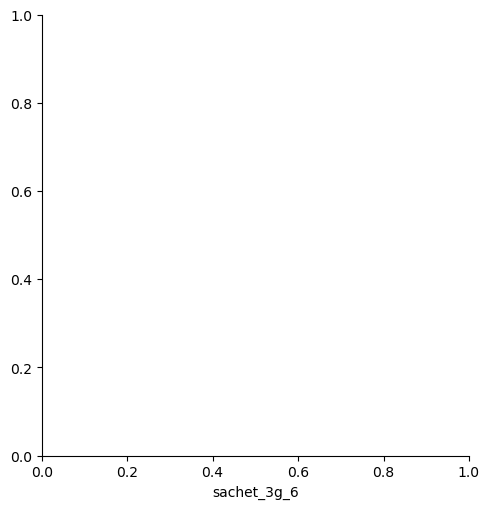

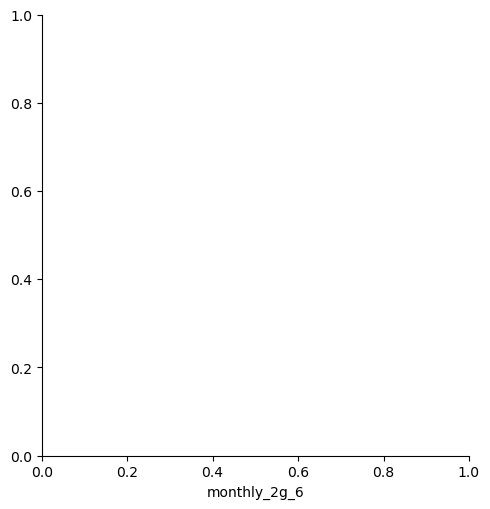

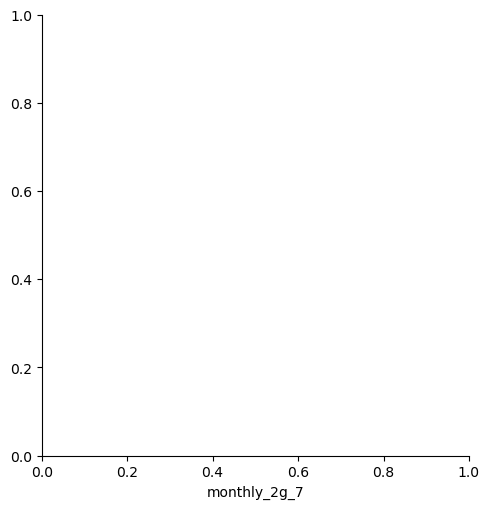

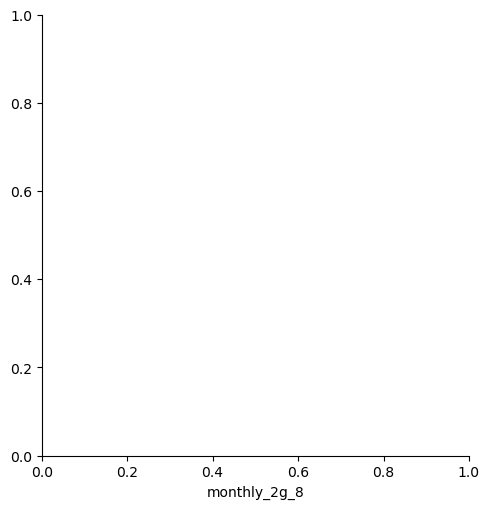

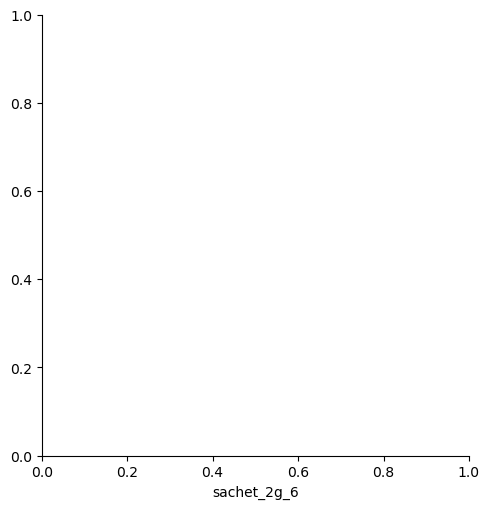

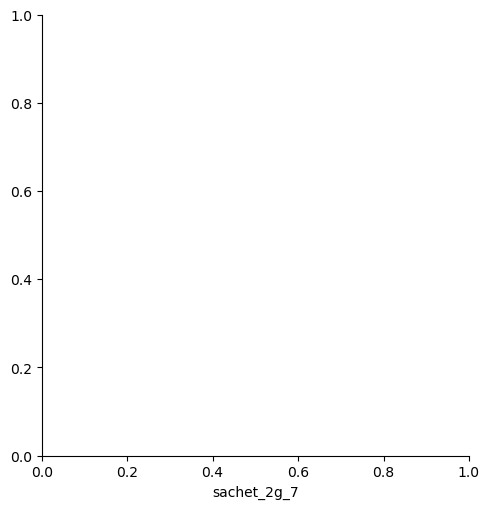

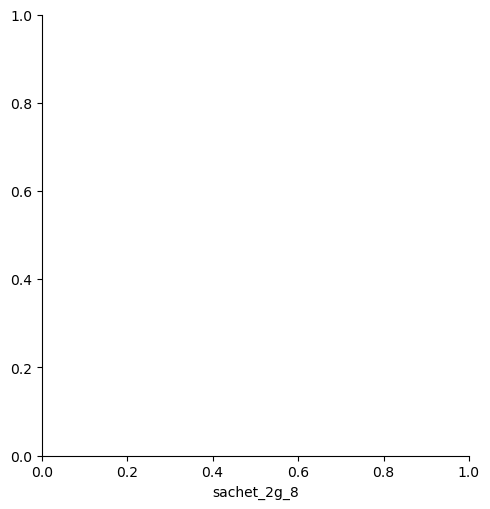

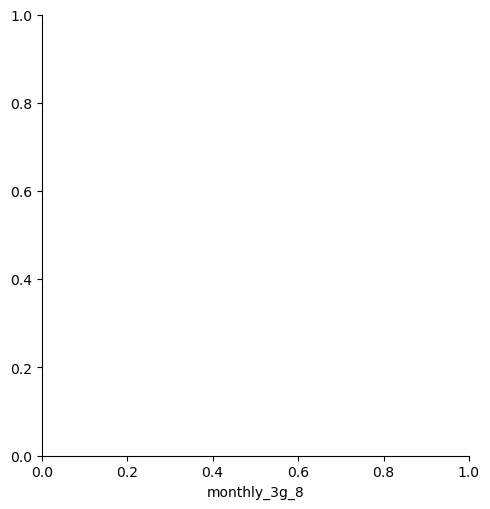

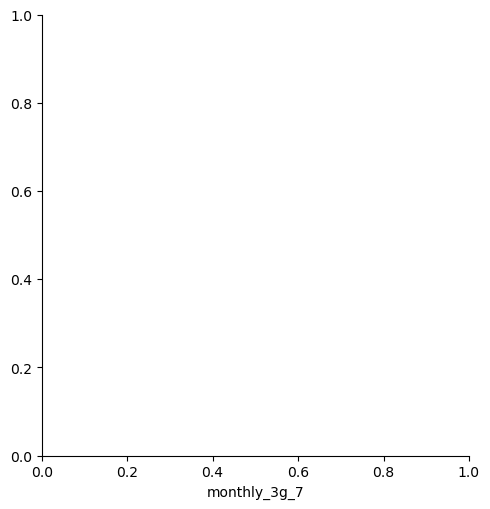

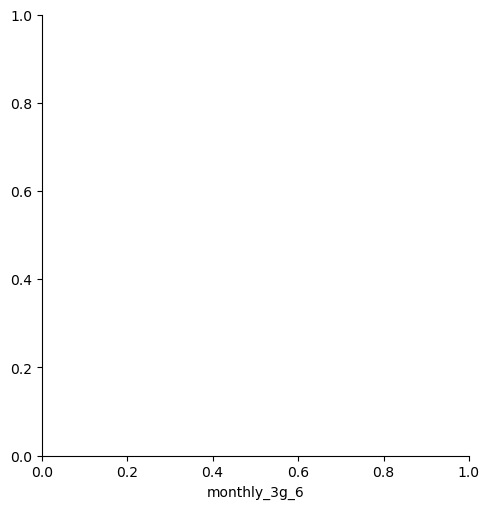

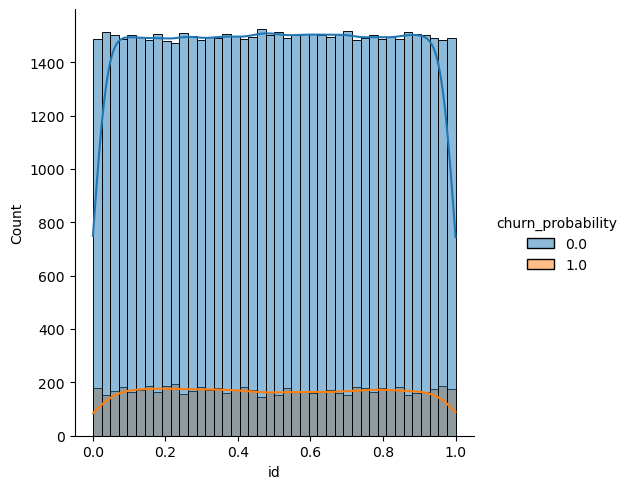

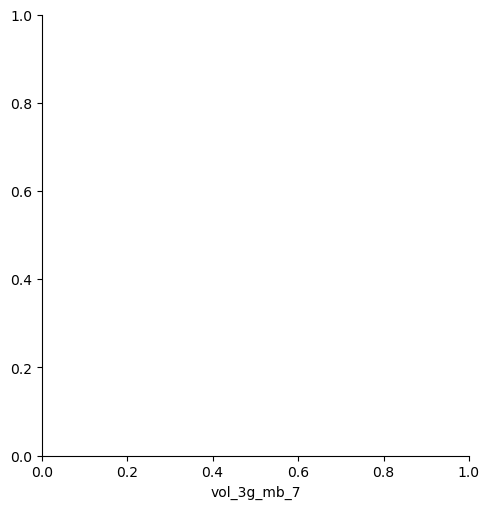

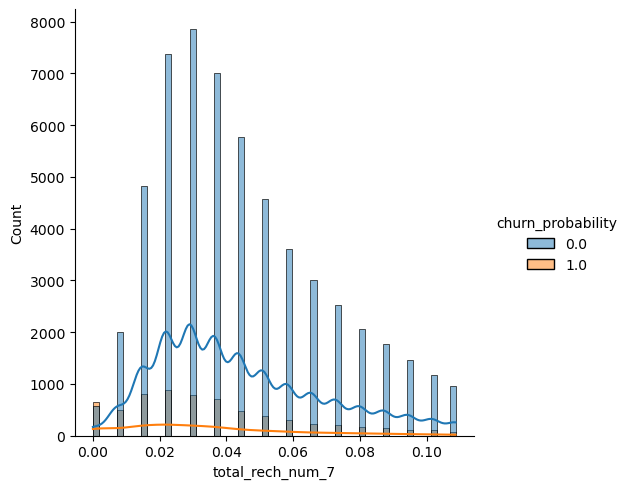

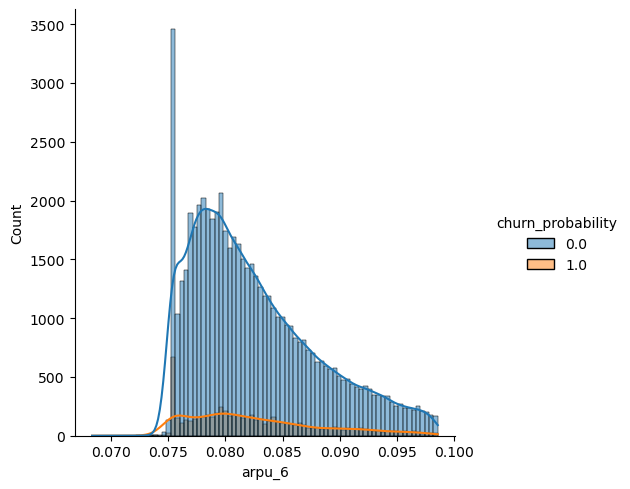

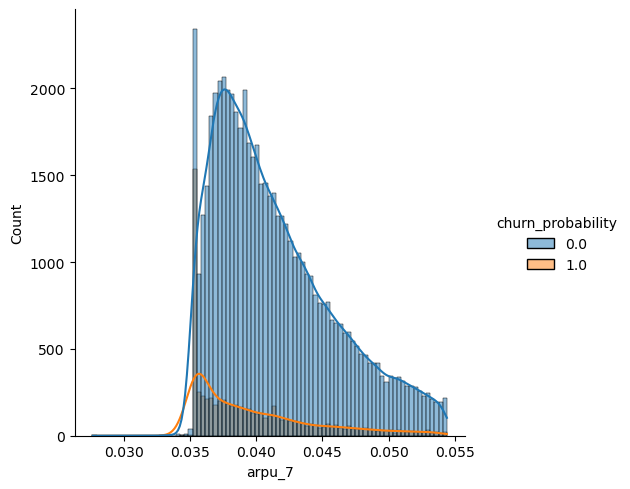

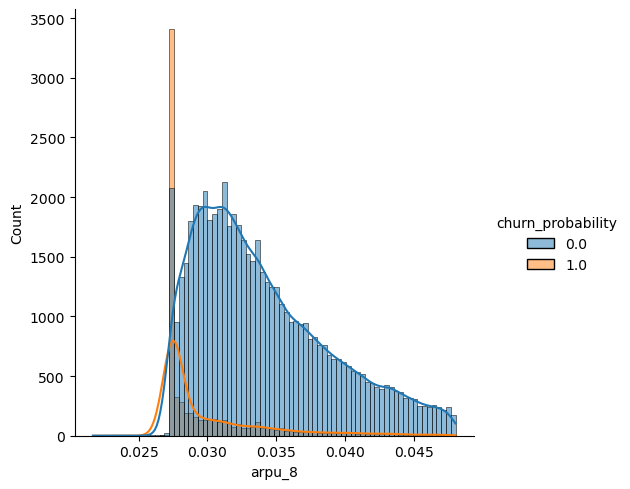

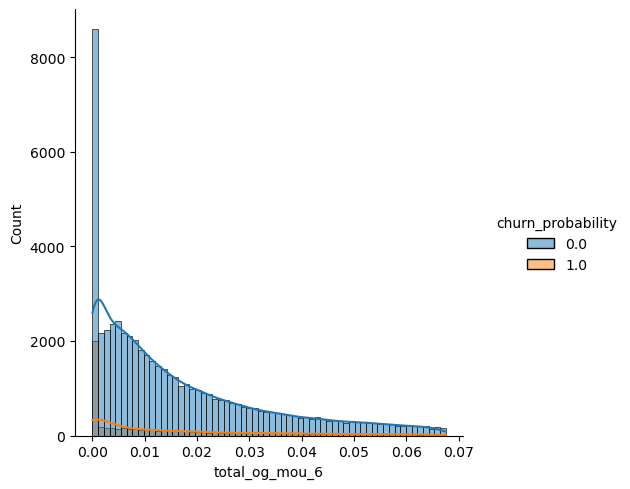

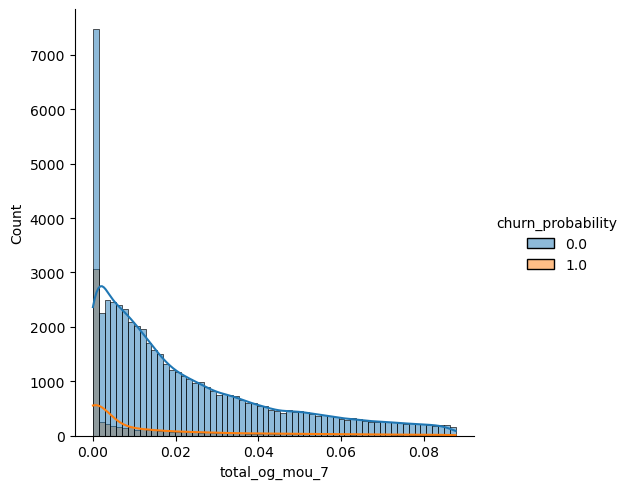

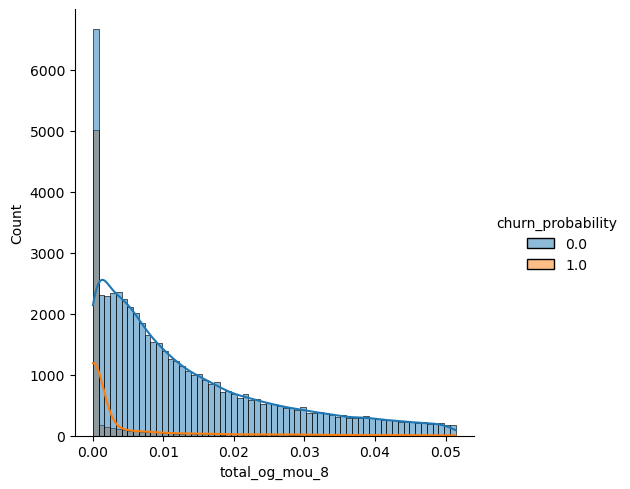

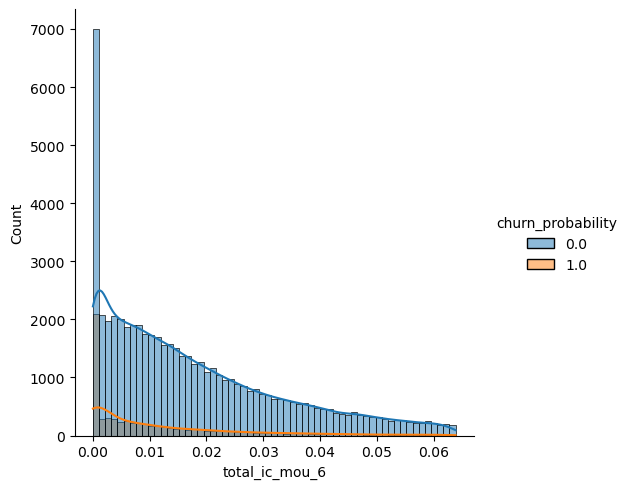

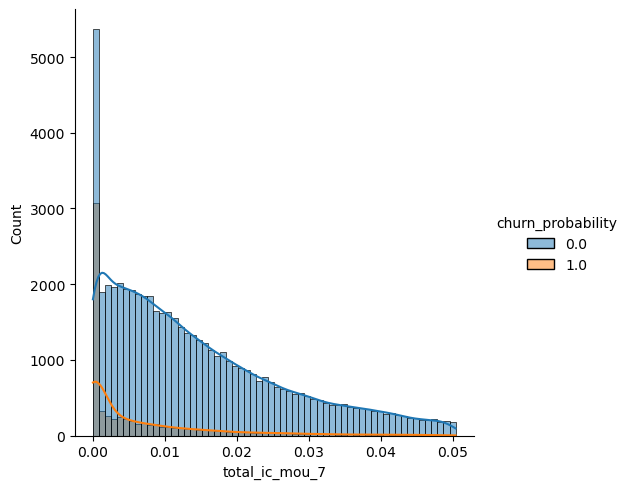

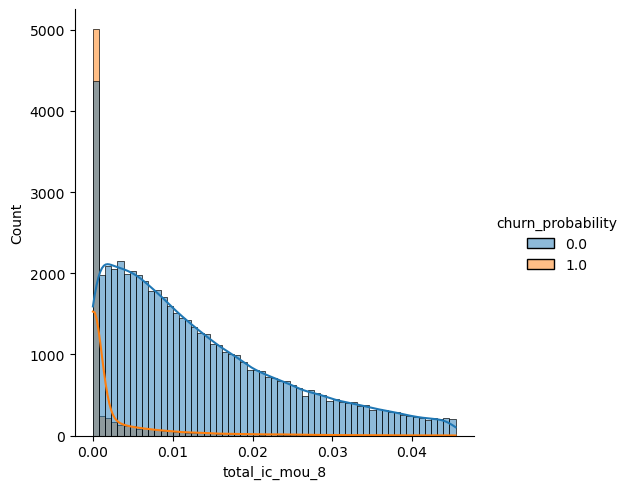

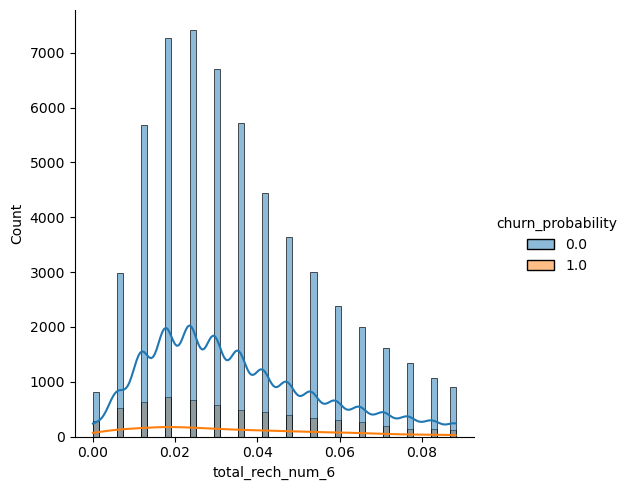

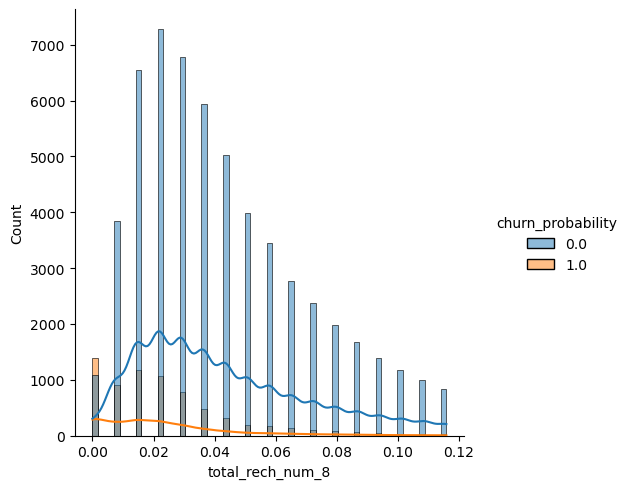

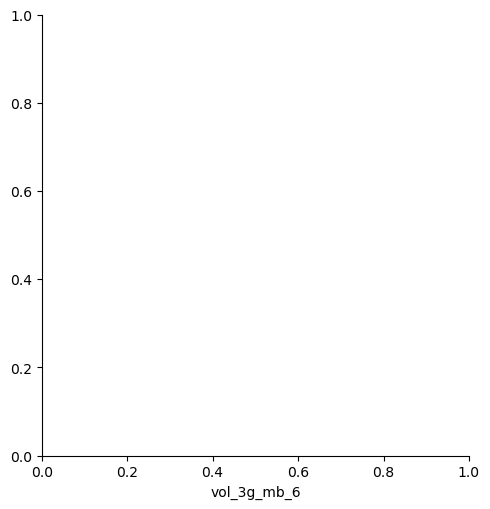

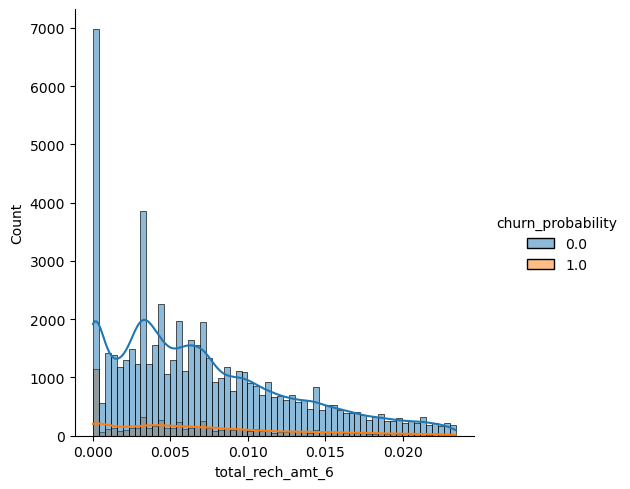

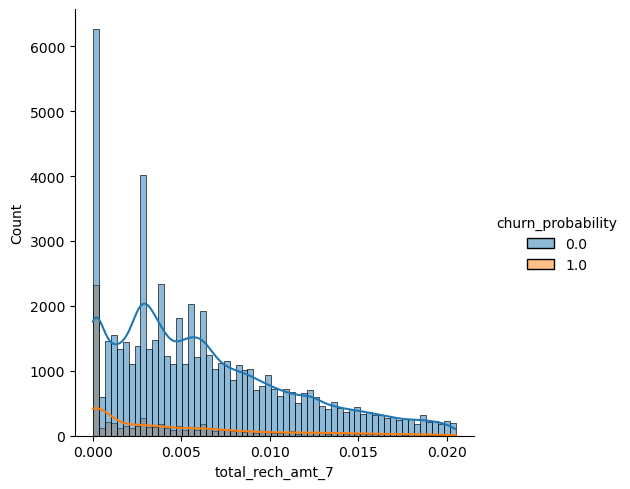

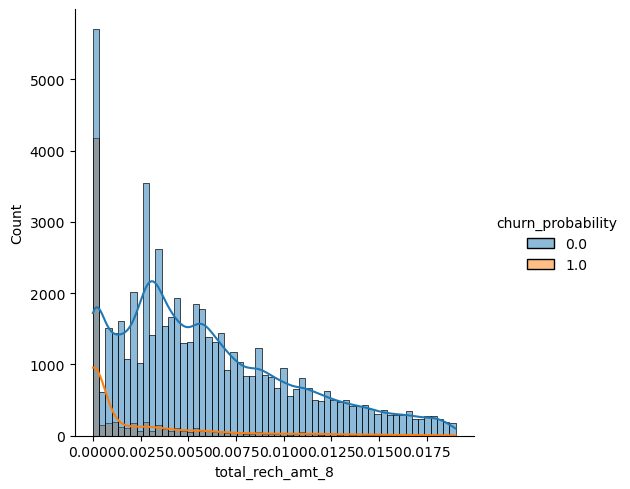

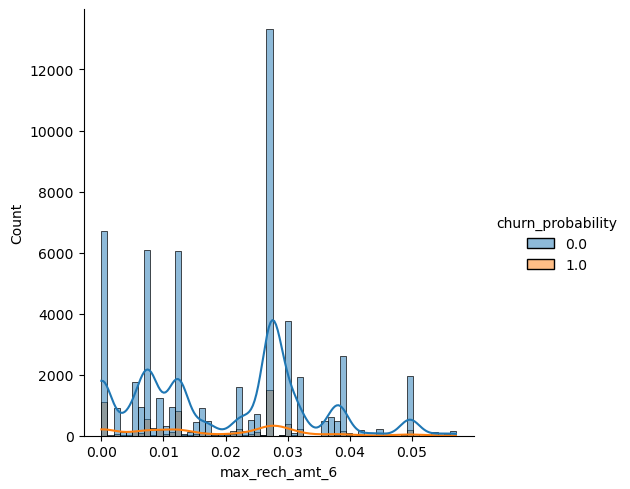

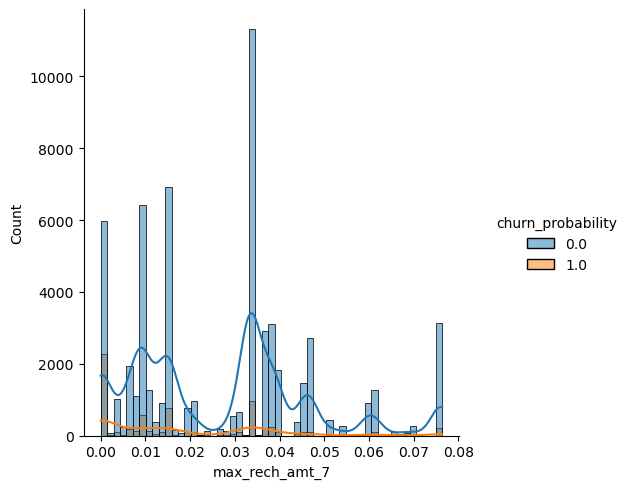

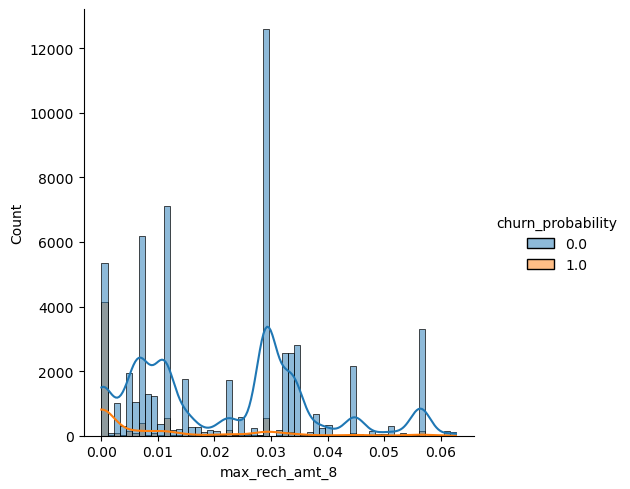

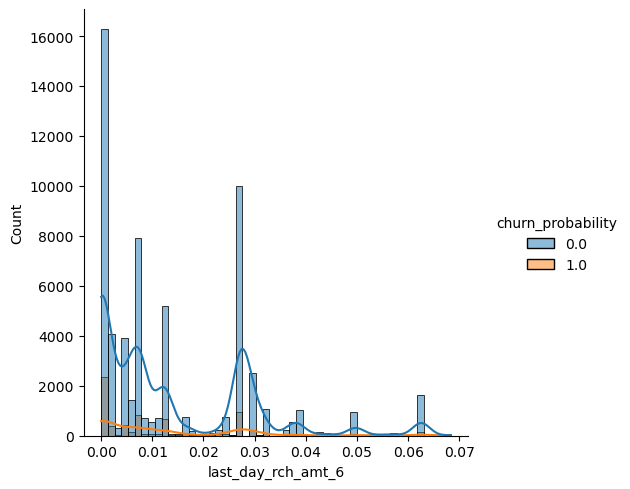

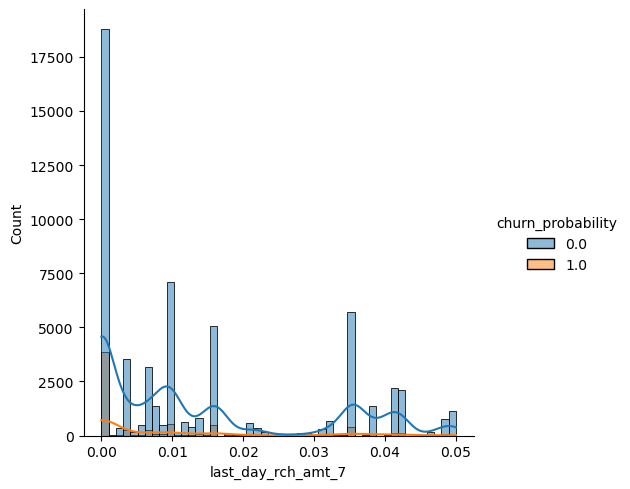

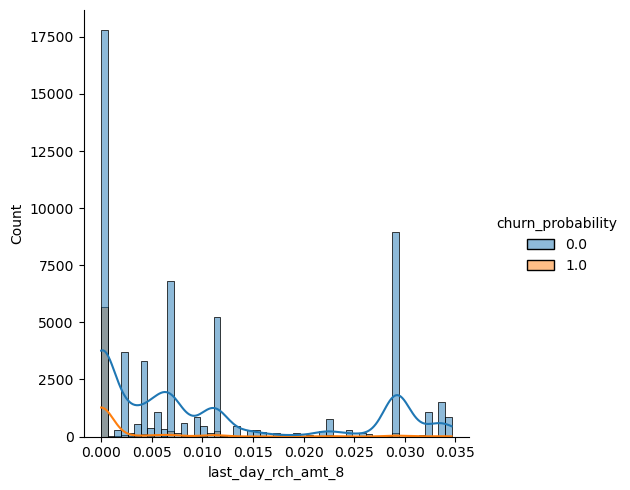

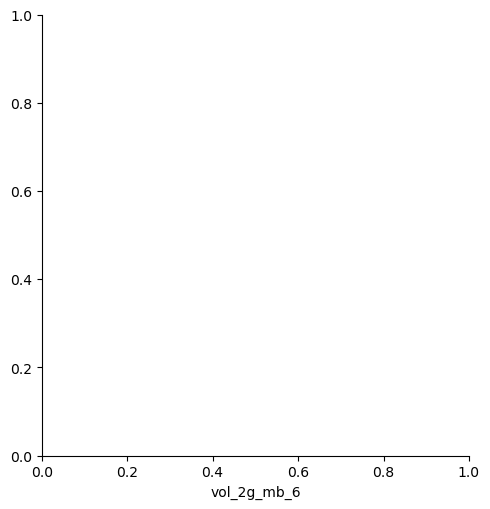

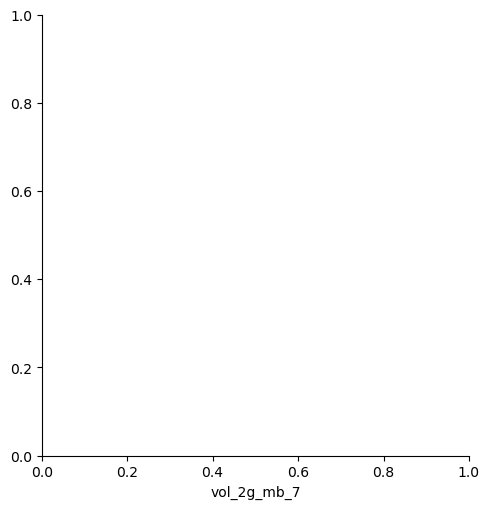

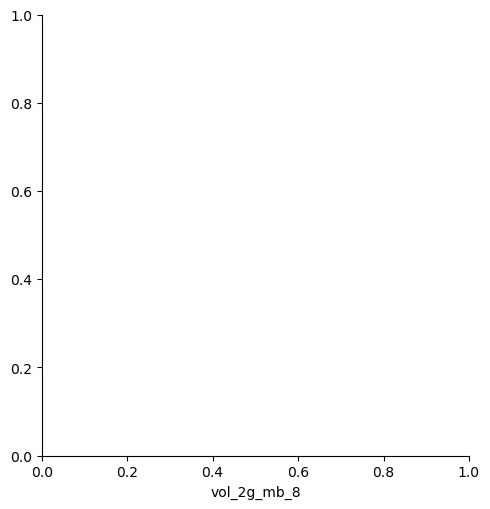

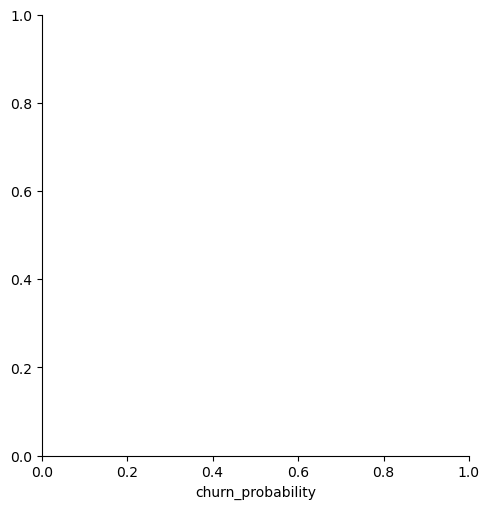

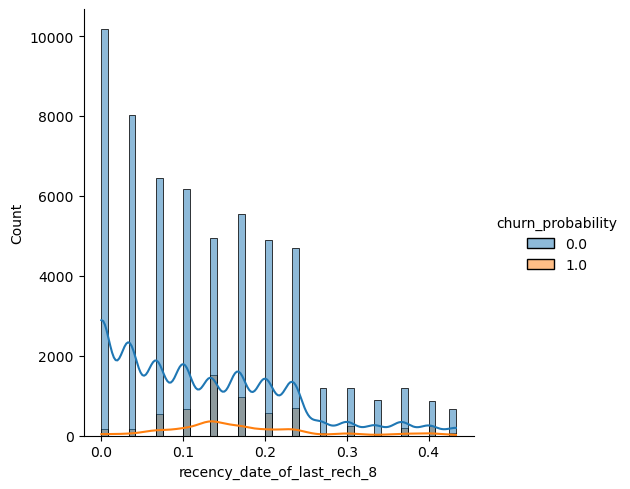

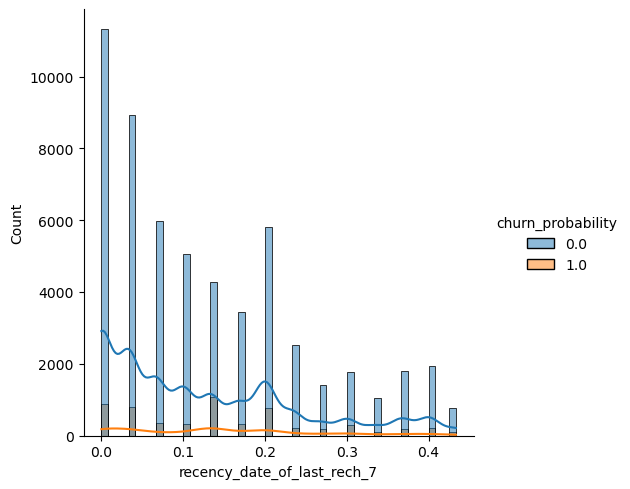

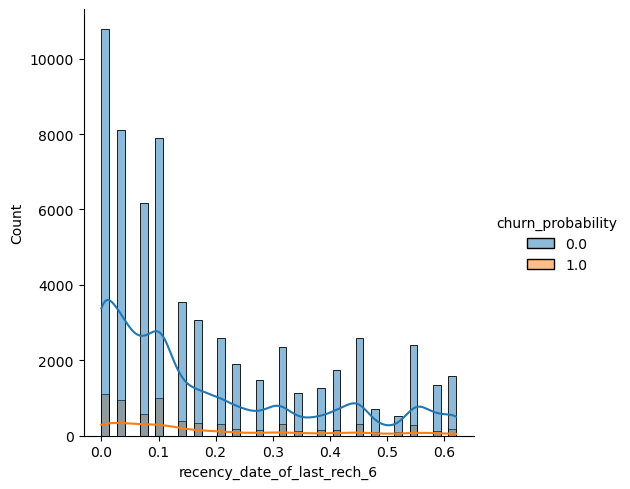

In [40]:
for i in num_variables:
    arr=np.array(df[i])
    uq=np.percentile(arr,70)
    lq=np.percentile(arr,20)
    iqr=uq-lq
    ul=uq+(1.5*iqr)
    ll=lq-(1.5*iqr)
    grouped_df=df[(df[i]<ul) & (df[i]>ll)]
    sns.displot(data=grouped_df,x=grouped_df[i],kde=True,hue='churn_probability')
    plt.xlabel(i)
    plt.show()